# Understanding Causality for Credit Card Customer Churn Prediction

## Abstract
Causal analysis in machine learning extends beyond traditional correlation-based techniques, offering insights into cause-and-effect relationships. This notebook introduces foundational data preparation techniques for causal analysis, including handling missing data, feature selection, visualization, encoding categorical variables, and modeling. By the end of this notebook, we will understand how these techniques support robust causal inference and model interpretation, laying the groundwork for reliable decision-making in real-world applications.

We demonstrate these principles through a **credit card customer churn classification** example, using a dataset containing customer attributes such as transaction count, transaction amount, revolving balance, customer age, and credit limit. The target variable, `Attrition_Flag`, is binary, indicating whether the customer has churned or not. By analyzing this dataset causally, we aim to uncover key drivers of customer churn, such as **Total_Trans_Ct** (transaction count) and **Total_Trans_Amt** (transaction amount), while ensuring our findings are interpretable and actionable. This real-world example highlights the importance of identifying confounders, mediators, and other causal relationships among features for effective model building.

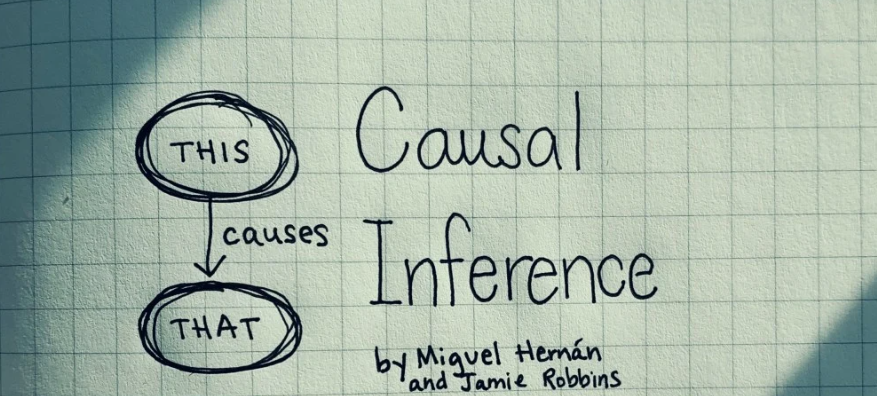

This notebook follows a systematic machine learning workflow, beginning with data preprocessing techniques such as handling missing values (e.g., imputing BMI with its median) and addressing outliers using the IQR method. Feature selection is performed using Recursive Feature Elimination (RFE) to identify the most relevant predictors. Next, various supervised learning models are trained and evaluated, with SHAP analysis employed to interpret feature importance and explain model predictions. To optimize performance, we utilize AutoML to identify and train the best-performing model. This pipeline illustrates how incorporating causal analysis improves model reliability, supports informed decision-making, and reveals actionable insights, particularly in healthcare applications.

## 1. Introduction  

### The Importance of Causality in Machine Learning  

In the field of machine learning, causality is not just an abstract concept; it is a cornerstone for making meaningful decisions. While traditional machine learning models are excellent at identifying patterns and generating predictions, they often fail to address the critical question of *why*. By focusing on cause-and-effect relationships, causality provides a deeper understanding of data, enabling us to derive actionable and impactful insights.  

Causality significantly enhances machine learning pipelines by enabling us to:  
- **Predict the Effects of Changes**: For example, determining, *“How would increasing the marketing budget impact sales?”* or *“What would happen to user engagement if we introduce a new feature?”*  
- **Mitigate Bias from Confounding Variables**: Causal analysis ensures that the conclusions drawn are robust and not influenced by hidden biases or irrelevant variables.  
- **Avoid Misleading Correlations**: By identifying true causal links, we can separate meaningful relationships from coincidental patterns that offer no actionable value.  

Integrating causality into machine learning transforms models from tools for prediction into frameworks for driving strategic decisions. It empowers organizations to not only anticipate future outcomes but also take actions that can shape those outcomes by leveraging key drivers and interventions.  


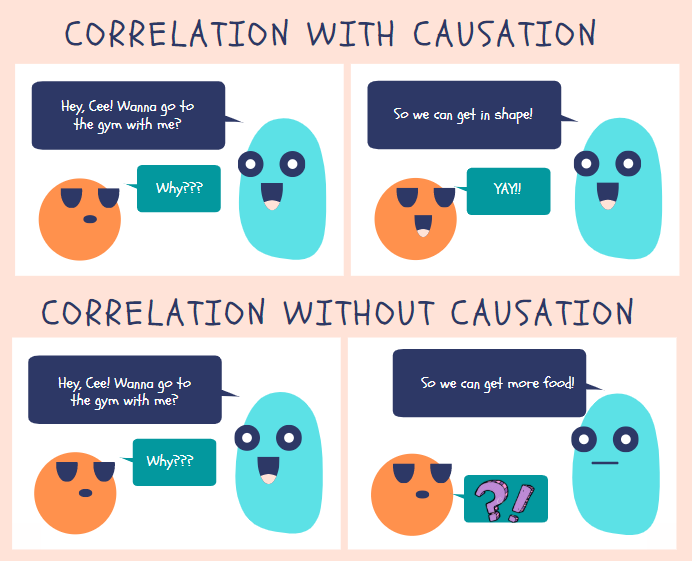

## 2. Theory

### 2.1 Principles of Causality
**Definition**:  
Causality explores cause-and-effect relationships between variables, going beyond simple associations to determine whether one variable directly influences another.

---

#### **Example**

This updated example aligns with the image, showcasing the concepts of causality and correlation through gym visits, fitness, and eating habits:

1. **Causality (arrows from Gym to Fitness):**
   - Going to the gym directly causes an improvement in fitness. The relationship is logical and intentional, as physical exercise leads to getting in shape.

2. **Correlation (bidirectional arrow between Gym and Eating More):**
   - There’s a correlation between going to the gym and eating more food. Both are observed to occur together, but they lack a direct cause-and-effect relationship.
   - Increased food consumption is not caused by the act of going to the gym itself. Instead, it may be indirectly linked through a third factor, such as increased hunger after working out.

---

#### **Explanation of Key Concepts**
- **Causality**: Represents a direct cause-and-effect relationship between two variables (e.g., gym attendance directly improving fitness levels through physical activity).
- **Correlation**: Describes a statistical relationship where two variables occur together but lack a direct cause-and-effect connection (e.g., gym visits and increased food consumption, which are linked by a shared factor like post-exercise hunger).

---

#### **Connection to the Image**
- **Causality in the Image**:
   - The first part of the image demonstrates causality, where going to the gym results in getting in shape. This is a logical cause-and-effect relationship.
- **Correlation in the Image**:
   - The second part of the image shows a correlation, where gym visits and eating more food are associated. However, there is no direct causal link between the two; the connection could be due to external factors, such as post-workout hunger.

## 2.2 Feature Engineering

---

### 2.2.2 Feature Selection
**Why It Matters**:  
Irrelevant or redundant features can introduce noise, increase model complexity, and obscure causal relationships.

#### **Techniques**:
1. **Filter Methods**:
   - Use statistical measures like correlation, chi-square tests, or mutual information.
   - **Example**: Remove features with low variance.

2. **Wrapper Methods**:
   - Techniques such as Recursive Feature Elimination (RFE).
   - Forward/Backward selection based on a model evaluation metric.

3. **Embedded Methods**:
   - Use regularization techniques like LASSO (L1 Regularization).
   - Leverage tree-based feature importance (e.g., feature importance scores from Random Forests or XGBoost).

4. **Domain Knowledge**:
   - Incorporate expert knowledge to prioritize and select relevant features.

---

### 2.2.3 Encoding Categorical Variables
**Why It Matters**:  
Most machine learning algorithms require categorical variables to be encoded numerically.

#### **Techniques**:
1. **Label Encoding**:
   - Assigns integer values to categories.
   - **Pros**: Simple and quick.
   - **Cons**: Implicit ordinal relationships may mislead the model.

2. **One-Hot Encoding**:
   - Creates binary columns for each category.
   - **Pros**: Removes implicit ordering.
   - **Cons**: Can lead to high-dimensional data.

3. **Target Encoding**:
   - Replaces categories with mean target values (useful for high-cardinality features).
   - **Caution**: Requires regularization to prevent overfitting.

4. **Binary Encoding**:
   - Converts categories to binary digits and assigns columns accordingly.
   - **Benefit**: Reduces dimensionality while preserving category uniqueness.

---

## 2.3 Causal Models

---

### 2.3.1 Structural Equation Models (SEMs)  
Structural Equation Models (SEMs) explicitly capture causal relationships between variables using mathematical equations.  

#### **Key Features**:
1. **Equations for Relationships**:  
   SEMs describe dependencies between variables using linear or non-linear equations.  
   - **Example**:  
     \[
     Y = \beta_0 + \beta_1 X + \epsilon
     \]
     - **\( Y \)**: Dependent variable (outcome).  
     - **\( X \)**: Independent variable (cause).  
     - **\( \beta_1 \)**: Coefficient representing the strength of the causal effect of \( X \) on \( Y \).  
     - **\( \epsilon \)**: Error term capturing unobserved factors.  
   - **Interpretation**: A unit increase in \( X \) leads to a change of \( \beta_1 \) in \( Y \).  

2. **Latent Variables**: SEMs can include unobservable factors (e.g., psychological traits) that influence observed variables.  
3. **Model Testing**: Hypothesis testing is used to determine whether a proposed causal structure fits the observed data.  

---
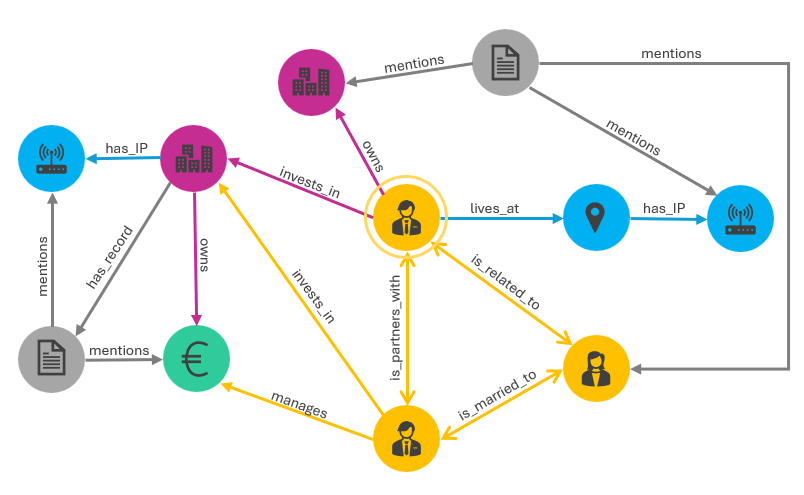
### 2.3.2 Directed Acyclic Graphs (DAGs)  
Directed Acyclic Graphs (DAGs) are graphical representations of causal relationships. Variables are nodes, and directed edges (arrows) represent causal influences.

#### **Key Properties**:
1. **Directed**: Arrows indicate the direction of causality.  
2. **Acyclic**: No feedback loops; a variable cannot cause itself.  
3. **Confounders**: DAGs explicitly represent confounders that affect multiple variables.

#### **Example**:  
A DAG for healthcare outcomes:  
- Smoking directly causes lung cancer.  
- Genetics is a confounder, influencing both smoking behavior and lung cancer risk.

#### **Use Cases**:
1. Identifying confounding variables.  
2. Designing experiments (e.g., randomized controlled trials).  
3. Ensuring proper variable selection for predictive models.  

---

### 2.3.3 Causal Inference Algorithms  

#### **1. Do-Calculus (Interventions)**  
- **Developed by**: Judea Pearl.  
- **Purpose**: Formalizes interventions to isolate causal effects.  
- **Example**: Measuring the effect of a drug (\( X \)) on recovery (\( Y \)) by ensuring the drug administration is independent of patient characteristics.  
- **Use Case**: Commonly applied in A/B testing and policy evaluation.

---

#### **2. Propensity Score Matching (PSM)**  
- **Purpose**: Adjust for confounders in observational studies by matching treated and untreated individuals with similar characteristics.  
- **Process**:  
  1. Estimate the propensity score: the probability of receiving treatment given covariates.  
  2. Match treated individuals to untreated ones with similar propensity scores.  
  3. Compare outcomes to estimate the causal effect.  
- **Example**:  
  Comparing recovery rates of patients treated with Drug A vs. no treatment while controlling for age, gender, and baseline health.

---

#### **3. Inverse Probability Weighting (IPW)**  
- **Purpose**: Reweight the sample to account for confounders, making treated and untreated groups comparable.  
- **Process**:  
  1. Assign weights based on the inverse of the propensity score for treatment and non-treatment groups.  
  2. Use weighted averages to estimate the causal effect.  
- **Example**:  
  In a study on smoking cessation programs, IPW adjusts for differences in age, education, and health status between participants and non-participants.

#### **Comparison of Causal Inference Techniques**  

| **Method**                     | **Application**                          | **Advantages**                                      | **Limitations**                                    |  
|---------------------------------|------------------------------------------|----------------------------------------------------|---------------------------------------------------|  
| **Structural Equation Models (SEMs)**  | Testing causal hypotheses               | Can incorporate latent variables; offers flexible modeling options  | Requires prior knowledge of causal relationships   |  
| **Directed Acyclic Graphs (DAGs)**    | Identifying confounders and mediators   | Provides clear visual representation of relationships  | Primarily qualitative; lacks quantitative effect sizes |  
| **Do-Calculus**                  | Simulating the effects of interventions  | Robust framework for experimental designs           | Dependent on strong causal assumptions for accuracy |  
| **Propensity Score Matching**    | Observational studies                    | Helps reduce confounding bias; provides interpretable results  | May struggle with unmeasured confounders           |  
| **Inverse Probability Weighting**| Adjusting for confounding variables      | Effectively manages confounding                     | Sensitive to extreme weights and potential model inaccuracies |

---

#### 4.1 Feature Engineering and Selection for Causal Variables
- **Relevance to Causality**: In causality analysis, identifying relevant variables (e.g., treatment, confounders, and outcomes) is critical. AutoML tools can help automate feature selection by identifying the most predictive and influential variables.
- **How It Helps**:
  - Automates the identification of features strongly associated with the target variable, which can guide causal model construction.
  - Provides insights into potential confounders or mediators.

**Example**:
AutoML can rank features based on their importance, allowing researchers to focus on variables likely to have causal relationships.

---

#### 4.2 Efficient Model Exploration for Causal Effect Estimation
- **Relevance to Causality**: Estimating causal effects often requires fitting multiple models (e.g., propensity score models, treatment effect models). AutoML can automate this process.
- **How It Helps**:
  - Simplifies the task of fitting models such as propensity score estimators, matching algorithms, and counterfactual outcome models.
  - Evaluates models with different assumptions and selects the best-performing ones for causal inference.

**Example**:
AutoML frameworks can be adapted to test multiple causal models (e.g., logistic regression, gradient boosting) and recommend the most reliable one.

---

#### 4.3 Handling High-Dimensional Data
- **Relevance to Causality**: High-dimensional datasets (e.g., genomic or customer behavior data) can complicate causal analysis due to the large number of variables.
- **How It Helps**:
  - Automates dimensionality reduction (e.g., through PCA or feature elimination) to focus on the most important variables for causal relationships.
  - Handles feature interactions that might be critical in identifying causal pathways.

**Example**:
AutoML can reduce the computational burden by automatically filtering irrelevant variables and focusing on causal candidates.

---

#### 4.5 Democratizing Causal Analysis
- **Relevance to Causality**: Causal inference traditionally requires domain expertise and statistical knowledge, which can limit accessibility.
- **How It Helps**:
  - Makes causal analysis more accessible to non-experts by automating complex tasks, such as model tuning and diagnostics.
  - Reduces the time and expertise required to implement robust causal models.

**Example**:
With AutoML, practitioners can focus on defining causal assumptions (e.g., constructing a Directed Acyclic Graph) while the tool handles technical details.

---

#### Limitations of AutoML in Causal Analysis
While AutoML provides significant advantages, it has limitations in causality:
1. **Lack of Domain Knowledge**: AutoML cannot incorporate expert knowledge of causal relationships (e.g., defining the DAG or selecting valid instruments).
2. **Assumption Sensitivity**: AutoML focuses on predictive accuracy, which does not always align with causal validity.
3. **Limited Causal-Specific Features**: Most AutoML tools are not explicitly designed for causal inference and may overlook critical causal assumptions.

---

#### Future Directions
To fully integrate causality into AutoML, future advancements could include:
1. **Causal-Aware AutoML Frameworks**: Tools designed specifically for causal inference tasks, combining automation with causal principles.
2. **Integration of DAGs**: AutoML systems could allow users to define causal assumptions via DAGs, automating the downstream analysis.
3. **Counterfactual Analysis**: AutoML could extend to automating counterfactual reasoning and estimating "what-if" scenarios.

---

##Insights into the data -
- The dataset contains information on 10,127 bank customers.
- Categorical features include customer attrition status, gender, education level, marital status, income category, and card category.
- Numerical features include customer age, number of dependents, months as a customer, total product count, months of inactivity, contact count, credit limit, revolving balance, average open-to-buy credit, transaction amount changes, total transaction amount, total transaction count, transaction count changes, and average credit card utilization ratio.
- Attrition_Flag indicates customer churn status, where "Attrited Customer" represents churned customers, and "Existing Customer" represents those who haven't churned.
- The dataset is suitable for analyzing customer behavior and predicting churn.

SHAP Analysis -
SHAP (SHapley Additive exPlanations) analysis is a method used in machine learning for understanding and interpreting the predictions made by a model. It provides insights into how each feature contributes to the model's output for individual predictions.

# **Crash Course in Causality: Credit Card Customers Churn Prediction💡**

## Installing Libraries

In [4]:
#Installing Dependencies
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o
!pip install shap
!pip install dowhy
!pip install causalml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=612d300a3a56164f615f8489acd0f44f9bb7f1a909032be615fa1276a0527e27
  Stored in directory: /root/.cache/pip/wheels/0c/95/eb/b449c73f478dbc4557b80170cf7f2aa6db15862877e9a63536
Successfully built h2o


## Importing Necessary Libraries

In [26]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import logging
import csv
import time
import psutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
import shap
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import networkx as nx
import matplotlib.pyplot as plt

## Reading the data

In [6]:
# Reading CSV file into Pandas DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/ckulkarni13/Data_Science_Methods_Tools/main/BankChurners.csv")

In [7]:
# Getting a glimpse into the dataset
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [8]:
# Checking number of rows and columns of data
df.shape

(10127, 23)

In [9]:
data_types = df.dtypes
categorical_columns = data_types[data_types == 'object'].index
numerical_columns = data_types[data_types != 'object'].index

# Count the number of categorical and numerical columns
num_categorical_columns = len(categorical_columns)
num_numerical_columns = len(numerical_columns)

print(f'Number of Categorical Columns: {num_categorical_columns}')
print(f'Number of Numerical Columns: {num_numerical_columns}')

Number of Categorical Columns: 6
Number of Numerical Columns: 17


In [10]:
# Descriptive analysis for categorical data
df.describe(include='O')

Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127           10127          10127   
unique                  2      2               7              4   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count            10127         10127  
unique               6             4  
top     Less than $40K          Blue  
freq              3561          9436

In [11]:
# Descriptive analysis for numerical data
df.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
count         10127.000000           10127.000000   
mean              0.712222               0.274894   
std               0.238086               0.275691   
min               0.000000               0.000000   
25%               0.582000               0.023000   
50%               0.702000               0.176000   
75%               0.818000               0.503000   
max               3.714000               0.999000   

       Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
count                                       10127.000000                                                                                    
mean                                            0.159997                                                                                    
std                                             0.365301                                                                                    
min                                             0.000008                                                                                    
25%                                             0.000099                                                                                    
50%                                             0.000181                                                                                    
75%                                             

In [12]:
# Further insights into the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [13]:
#Checking if their are any missing values
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                                                                                                       0
Card_Category                                                                                                                         0
Months_on_book                                                                                                                        0
Total_Relationship_Count                                                                                                              0
Months_Inactive_12_mon                                                                                                                0
Contacts_Count_12_mon                                                                                                                 0
Credit_Limit                                                                                                                          0
Total_Revolving_Bal                                                                                                                   0
Avg_Open_To_Buy                                                                                                                       0
Total_Amt_Chng_Q4_Q1                                                                                                                  0
Total_Trans_Amt                                                                                                                       0
Total_Trans_Ct                                                                                                                        0
Total_Ct_Chng_Q4_Q1                                                                                                                   0
Avg_Utilization_Ratio                                                                                                                 0
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1    0
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2    0
dtype: int64

## Preprocessing Data (Dropping unnecessary columns)

In [14]:
# Dropping columns with unusual names
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

#Dropping CLIENTNUM column as it's a unique identifier and not useful for predictions.
df = df.drop( 'CLIENTNUM', axis=1)

In [15]:
#Shape of data after non-useful columns dropped for the dataset
df.shape

(10127, 20)

In [16]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

### Histograms

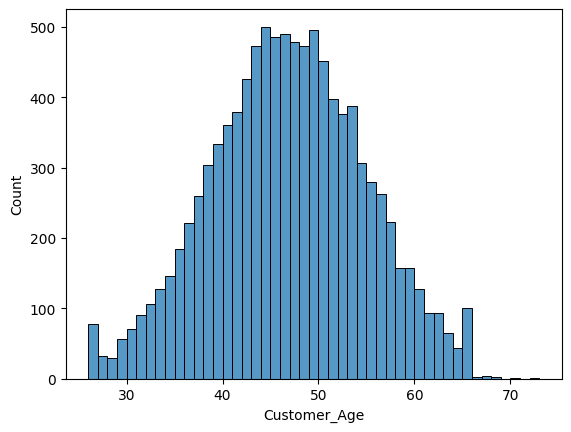

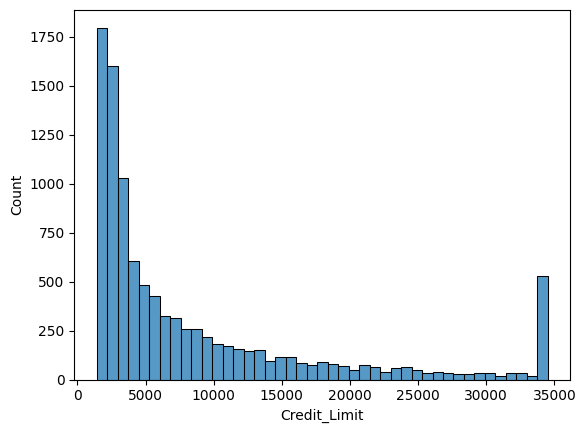

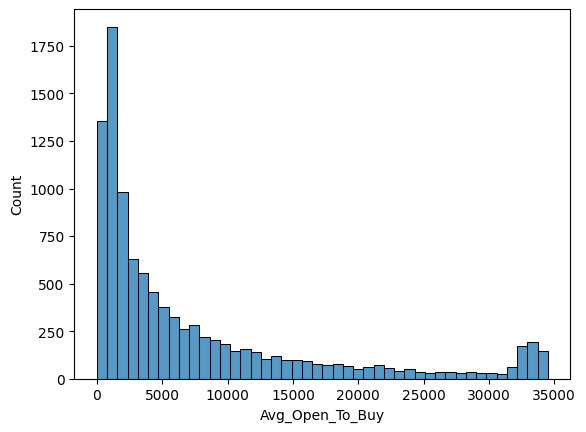

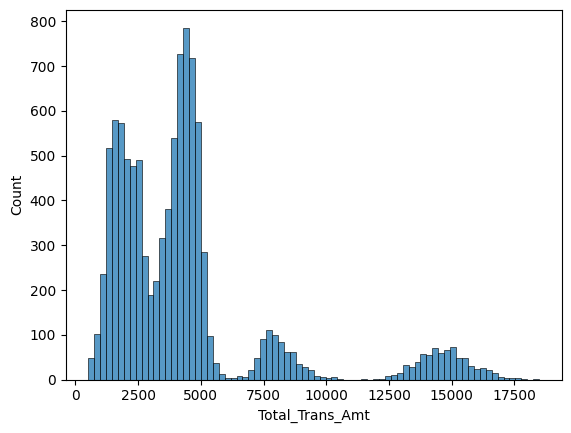

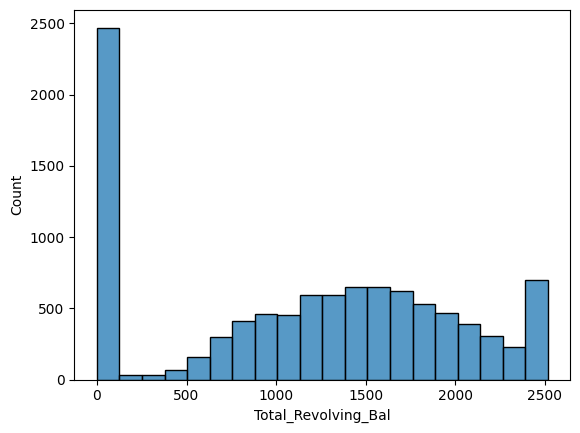

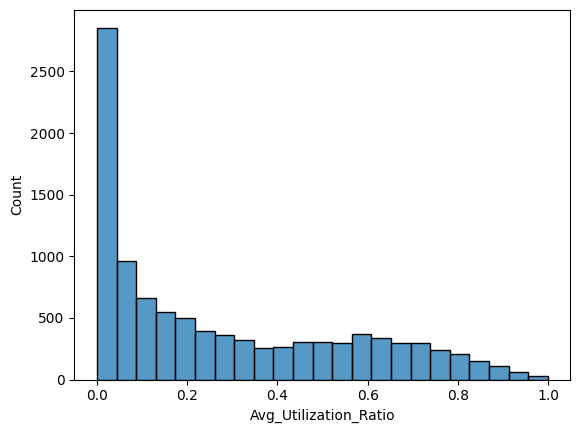

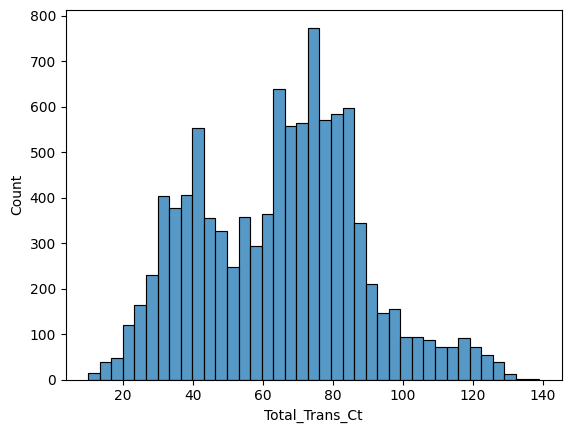

In [ ]:
numeric_columns = ['Customer_Age', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Revolving_Bal','Avg_Utilization_Ratio',  'Total_Trans_Ct']

def distribution(df,list):
    sns.histplot(df[list])
    plt.show()

for i in numeric_columns:
    #plt.grid(True)
    distribution(df,i)
    plt.show()

- Customer Age:
The distribution is roughly bell-shaped, indicating that the ages are normally distributed.
There are very few customers below 30 and above 70 years old.

- Avg_Open_To_Buy (The difference between the credit limit assigned to a customer and the current balance):
The distribution is right-skewed, meaning there are a lot of customers with a low open-to-buy value and fewer customers as the value increases.
There's a large peak at the lower end of the scale, suggesting many customers have a small amount of unused credit.

- Credit Limit:
Similar to Avg_Open_To_Buy, the distribution is right-skewed.
There's a significant number of customers with lower credit limits.
There are peaks at both ends of the distribution, indicating a group of customers with very high credit limits, which could be a separate customer segment such as premium or high-net-worth individuals.

- Total_Trans_Ct (Total transaction count):
The distribution is bimodal, with two peaks that suggest there are two distinct groups of customers based on transaction behavior.
Understanding why there are two modes might be critical to predict churn – it could be related to different types of customers, various products, or services they are using.

- Total_Trans_Amt (Total transaction amount):
The distribution is multimodal with several peaks, indicating multiple typical transaction amounts or groupings of transaction behaviors.
Like with Total_Trans_Ct, the reasons behind the various peaks may be essential for understanding customer behavior and, subsequently, for predicting churn

### Probability Plots

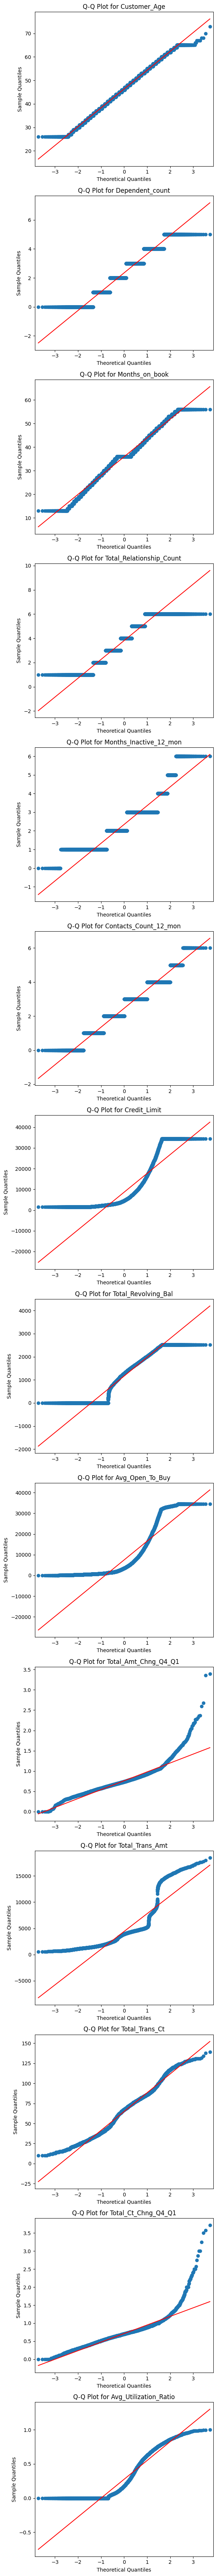

In [ ]:
# Set up the figure and axes
numeric_columns_list = df.select_dtypes(include=['int', 'float']).columns.tolist()
fig, axes = plt.subplots(nrows=len(numeric_columns_list), figsize=(6, 5 * len(numeric_columns_list)))

# Plot Q-Q plots for each numeric variable
for i, variable in enumerate(numeric_columns_list):
    # Generate Q-Q plot using statsmodels
    sm.qqplot(df[variable], line='s', ax=axes[i])
    axes[i].set_title(f'Q-Q Plot for {variable}')  # Set plot title

# Adjust layout
plt.tight_layout()
plt.show()

#Label Encoding

In [19]:
# Encoding categorical data to numerical value.

categorical_features = [
    'Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
    'Income_Category', 'Card_Category'
]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical feature
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

### Heatmap

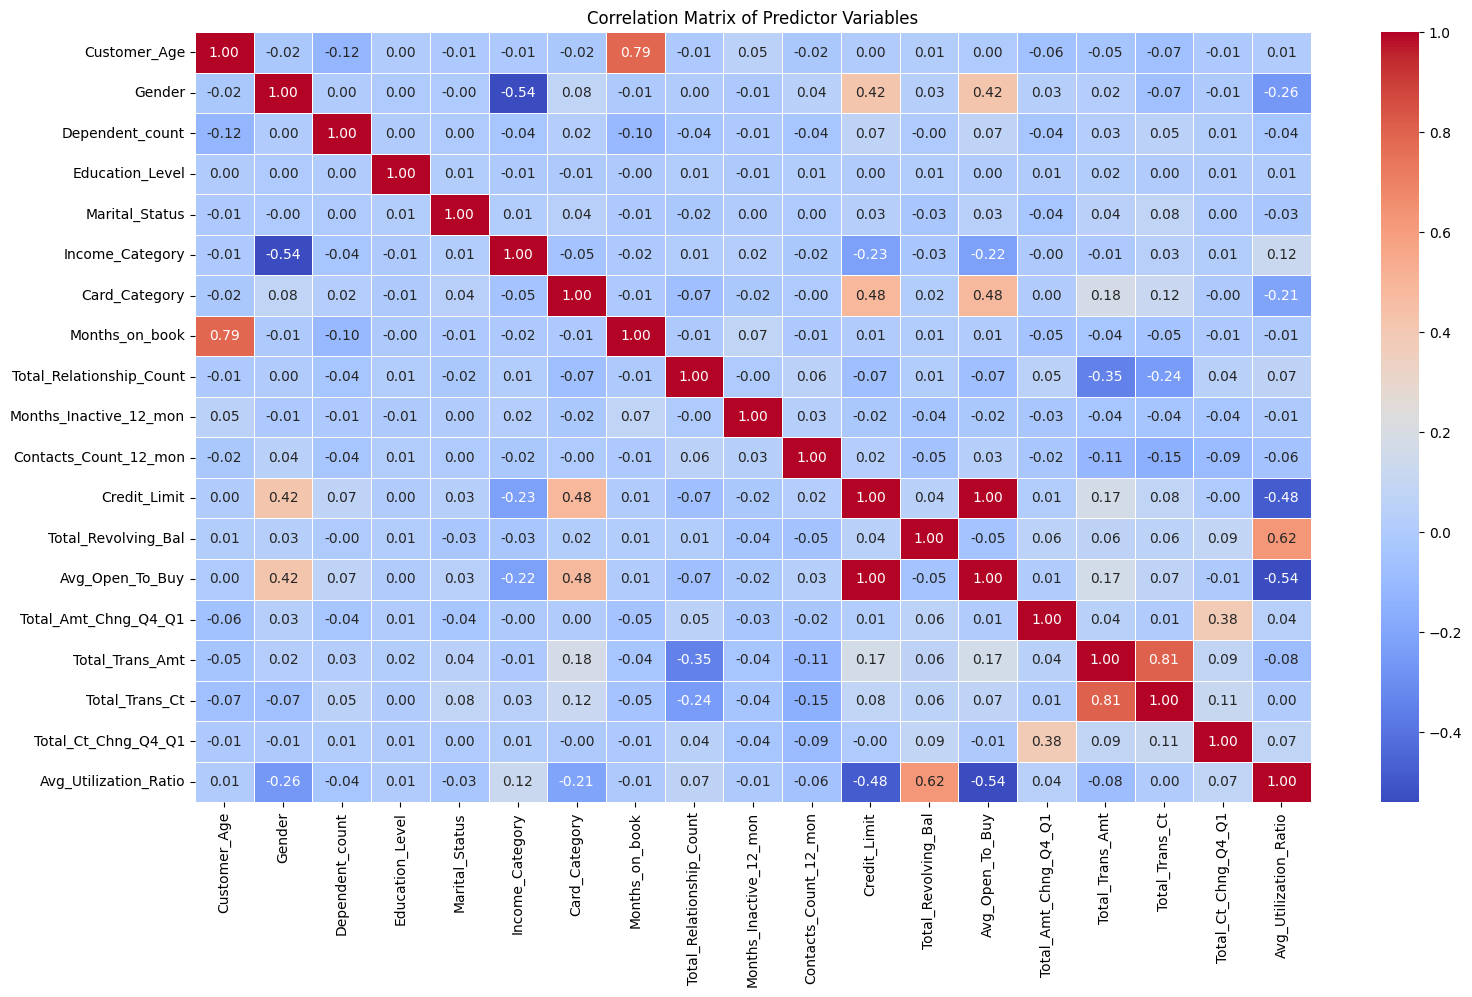

In [ ]:
# 1. Calculate correlations between numeric variables and the target variable
predictor_variables = df.drop(columns=['Attrition_Flag'])  # Exclude the target variable

# Calculate the correlation matrix
correlation_matrix = predictor_variables.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Predictor Variables')
plt.show()

"Months_on_book" and "Customer_Age" have a high positive correlation of 0.79, suggesting a strong relationship between these two variables. This means they are not independent.
"Credit_Limit" and "Avg_Open_To_Buy" also show a very high positive correlation of 0.99, which implies almost perfect positive linear relationship, and thus, they are not independent.
"Total_Trans_Amt" and "Total_Trans_Ct" have a high positive correlation of 0.81, indicating a significant relationship and dependence between these two variables.

## Feature selection

Index(['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Total_Revolving_Bal', 'Total_Relationship_Count'],
      dtype='object')


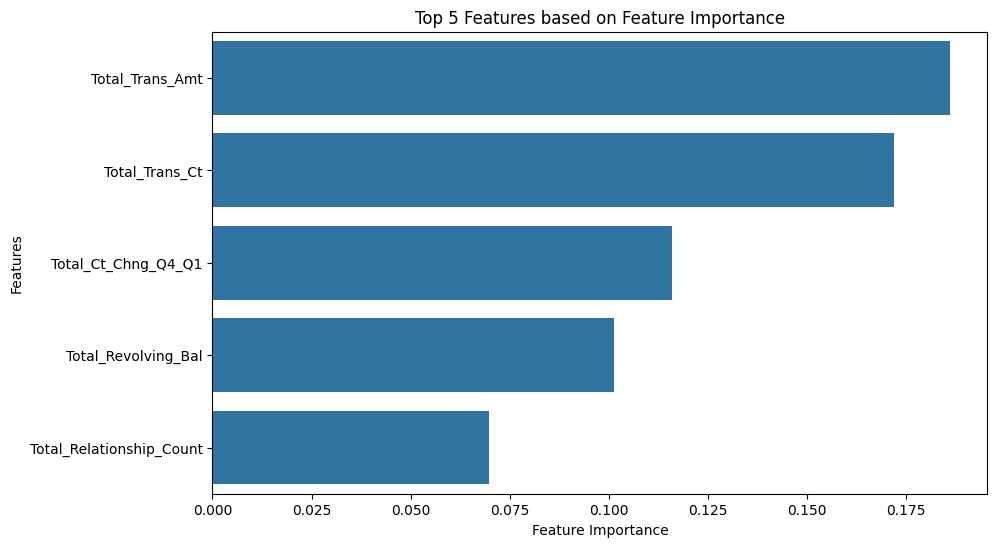

In [22]:
# Separate features
X = df.drop(columns=['Attrition_Flag'])
y = df['Attrition_Flag']

# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Select the top N important features
n_selected_features = 5  # You can adjust this value
selected_features_indices = feature_importances.argsort()[-n_selected_features:][::-1]
selected_features = X.columns[selected_features_indices]

# Print selected features
print(selected_features)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[selected_features_indices], y=selected_features, orient="h")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title(f"Top {n_selected_features} Features based on Feature Importance")
plt.show()


## DAG - Casuality

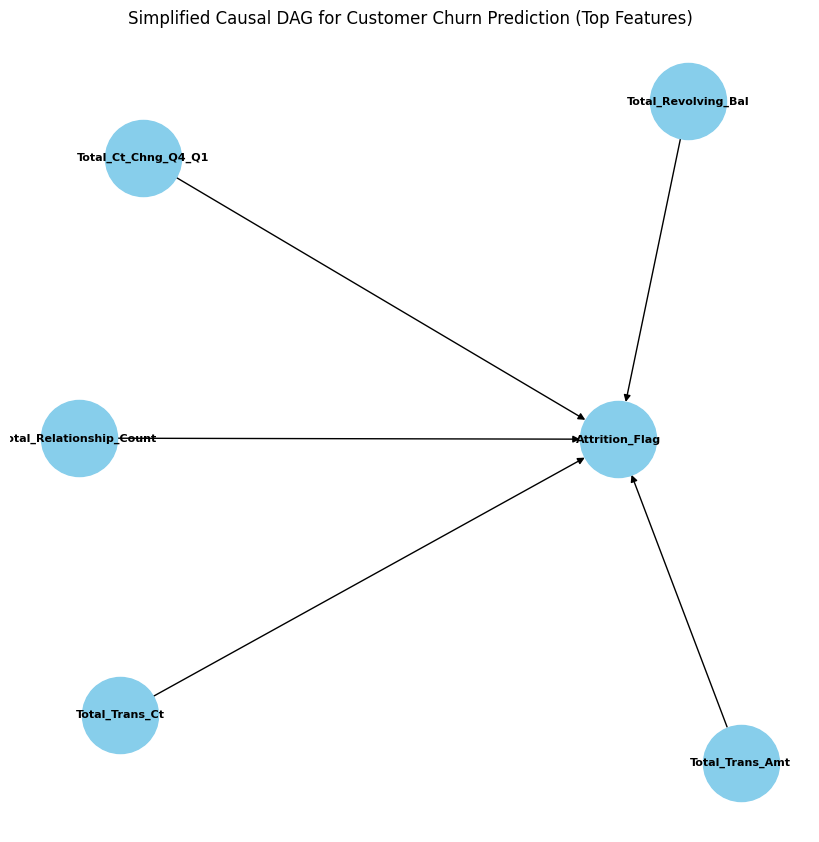

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the top features from your Random Forest model
top_features = ['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1','Total_Revolving_Bal', 'Total_Relationship_Count']

# Initialize a directed graph
causal_graph = nx.DiGraph()

# Add causal relationships for the top features
causal_graph.add_edges_from([(feature, 'Attrition_Flag') for feature in top_features])

# Plot the simplified DAG
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(causal_graph)  # Layout for nodes
nx.draw(causal_graph, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=8, font_weight='bold')
plt.title('Simplified Causal DAG for Customer Churn Prediction (Top Features)')
plt.show()

#Handling Outliers

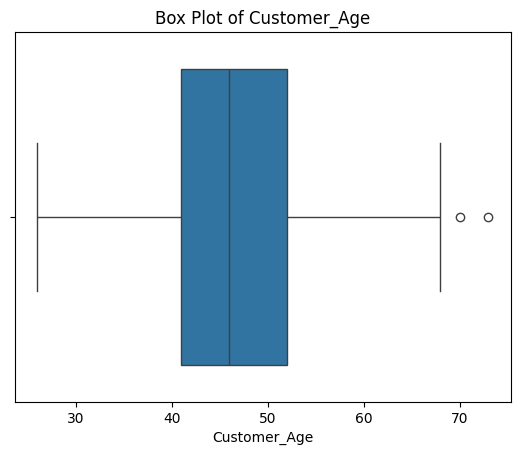

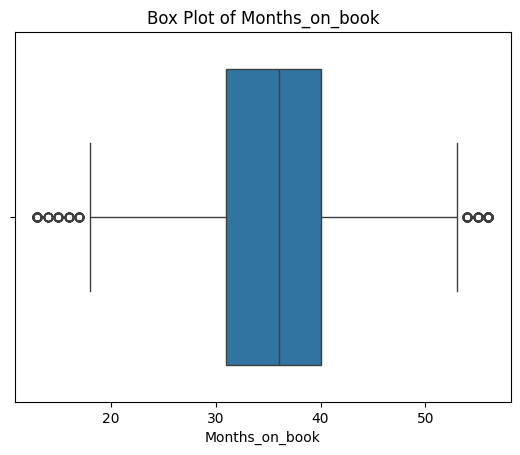

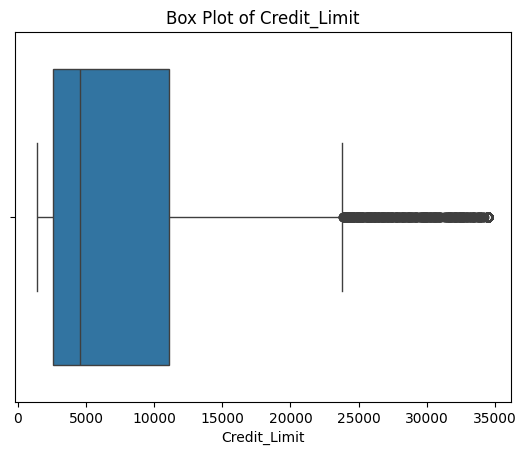

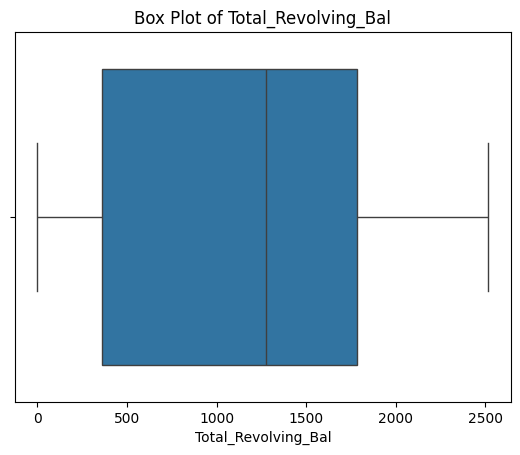

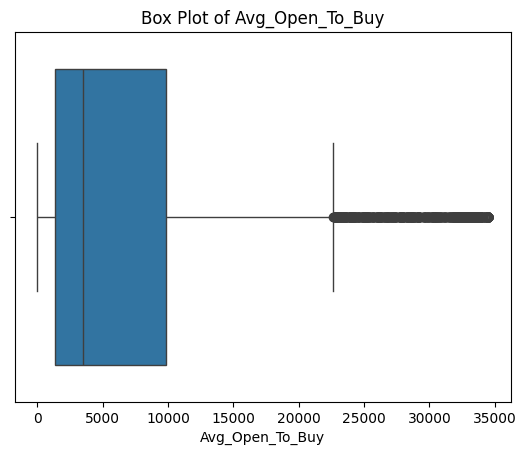

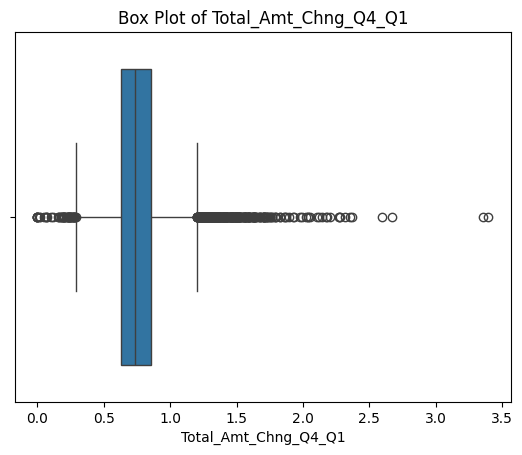

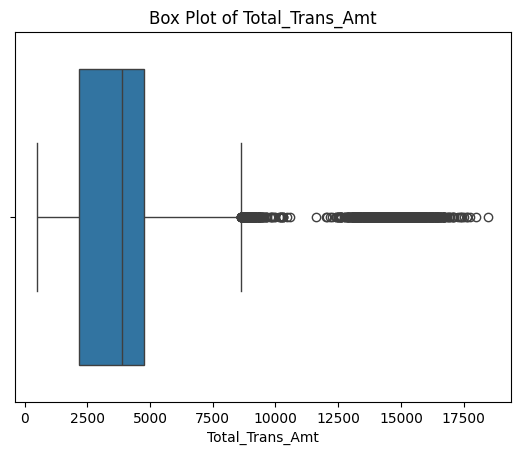

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for numeric variables (excluding 'Attrition_Flag')
numeric_columns = ['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal','Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt']

for column in numeric_columns:
    sns.boxplot(x=df[column])
    plt.xlabel(column)
    plt.title(f'Box Plot of {column}')
    plt.show()


In [28]:
# Specify columns with outliers
columns_with_outliers = [ 'Credit_Limit',  'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1']

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from the DataFrame
df_cleaned = remove_outliers_iqr(df, columns_with_outliers)

In [29]:
# Check the number of rows removed
rows_removed = len(df) - len(df_cleaned)
print(f"Number of rows removed due to outliers: {rows_removed}")

Number of rows removed due to outliers: 2466


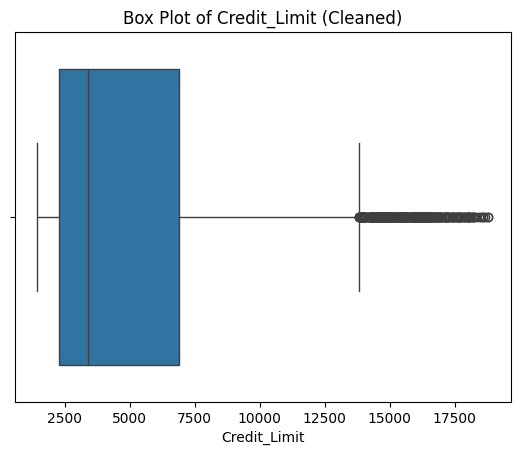

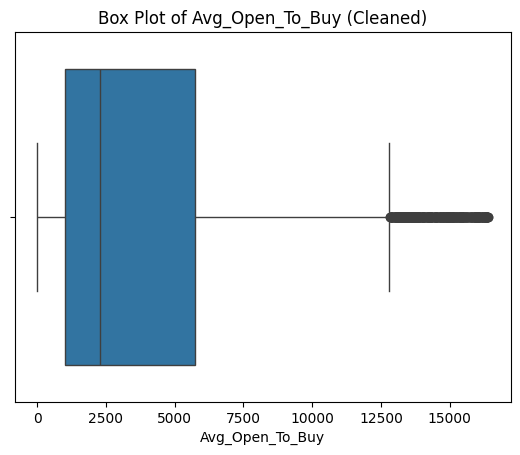

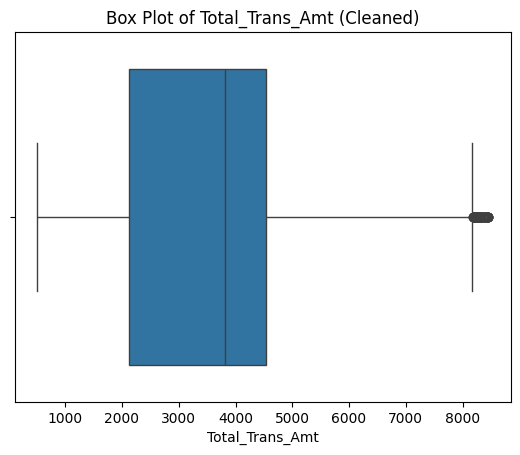

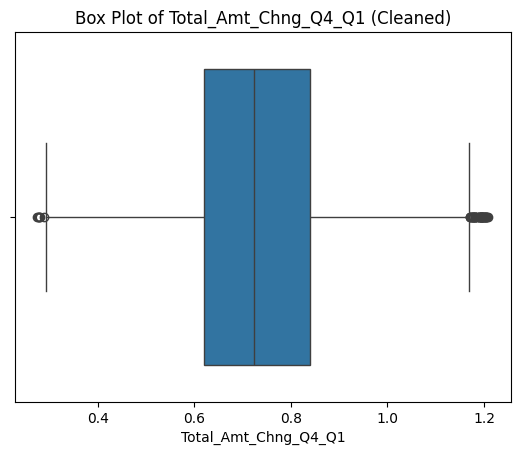

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for cleaned data
for column in columns_with_outliers:
    sns.boxplot(x=df_cleaned[column])
    plt.xlabel(column)
    plt.title(f'Box Plot of {column} (Cleaned)')
    plt.show()

In [31]:
from sklearn.model_selection import train_test_split
X = df_cleaned.drop(columns=['Attrition_Flag'])  # Features
y = df_cleaned['Attrition_Flag']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Logistic Regression

In [32]:
logR_Model = LogisticRegression(max_iter=1000)
logR_Model.fit(X_train, y_train)

y_pred_logR = logR_Model.predict(X_test)

# Accuracy
accuracy_logR = accuracy_score(y_test, y_pred_logR)
print(f"Logistic Regression Accuracy: {accuracy_logR:.4f}")

Logistic Regression Accuracy: 0.9047


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
coefficients = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': logR_Model.coef_[0]})
print(coefficients)

                    Variable  Coefficient
0               Customer_Age    -0.038005
1                     Gender     0.286425
2            Dependent_count    -0.140847
3            Education_Level    -0.041840
4             Marital_Status    -0.481963
5            Income_Category    -0.049373
6              Card_Category    -0.099928
7             Months_on_book     0.023086
8   Total_Relationship_Count     0.313035
9     Months_Inactive_12_mon    -0.554436
10     Contacts_Count_12_mon    -0.616951
11              Credit_Limit     0.000303
12       Total_Revolving_Bal     0.000579
13           Avg_Open_To_Buy    -0.000276
14      Total_Amt_Chng_Q4_Q1     0.003719
15           Total_Trans_Amt    -0.000732
16            Total_Trans_Ct     0.124359
17       Total_Ct_Chng_Q4_Q1     0.662353
18     Avg_Utilization_Ratio    -0.000153


- Age: Coefficient: -0.026830
Interpretation: For every one year increase in the customer's age, the log odds of churn decreases by 0.026830. This suggests that older customers are less likely to churn than younger ones.


- Gender: Coefficient: 0.157964
Interpretation: If we code Gender as a binary variable (e.g., 0 for females and 1 for males), the positive coefficient suggests that being male is associated with a higher log odds of churn compared to being female.


- Education_Level: Coefficient: -0.058656
Interpretation: Higher education levels are associated with a decrease in the log odds of churn. This might imply that more educated customers are less likely to churn.


- Marital_Status: Coefficient: -0.372631
Interpretation: Assuming marital status is binary (e.g., 0 for single, 1 for married), the negative coefficient indicates that married customers are less likely to churn compared to single customers.


- Contacts_Count_12_mon: Coefficient: -0.670046
Interpretation: More frequent contacts with the customer over the last 12 months are associated with a substantial decrease in the log odds of churn. This could mean that engaging customers might reduce the likelihood of churn.


- Total_Trans_Ct: Coefficient: 0.127878
Interpretation: A higher total transaction count is associated with an increase in the log odds of churn.

- Avg_Utilization_Ratio: Coefficient: -0.081932
Interpretation: An increase in the average utilization ratio is associated with a decrease in the log odds of churn. This suggests that customers who use a larger proportion of their available credit are less likely to churn.

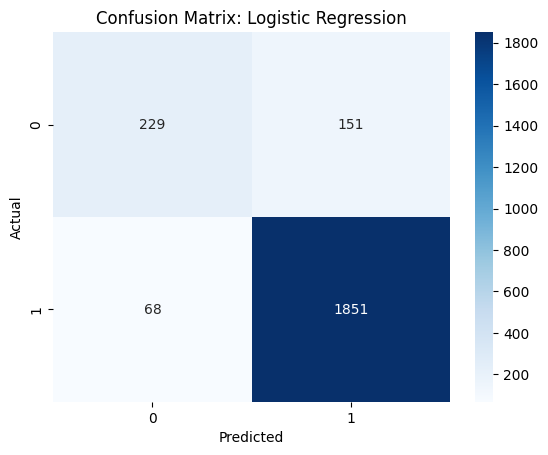

In [34]:
confusion_matrix_logR = confusion_matrix(y_test, y_pred_logR)
sns.heatmap(confusion_matrix_logR, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Classification Report

In [35]:
# Calculate classification report
classification_rep = classification_report(y_test, y_pred_logR)
print("Accuracy of Decision Tree:", accuracy_logR)
print("\n Classification Report:\n", classification_rep)

Accuracy of Decision Tree: 0.9047411918225315

 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.60      0.68       380
           1       0.92      0.96      0.94      1919

    accuracy                           0.90      2299
   macro avg       0.85      0.78      0.81      2299
weighted avg       0.90      0.90      0.90      2299



#SHAP on Logistic Regression

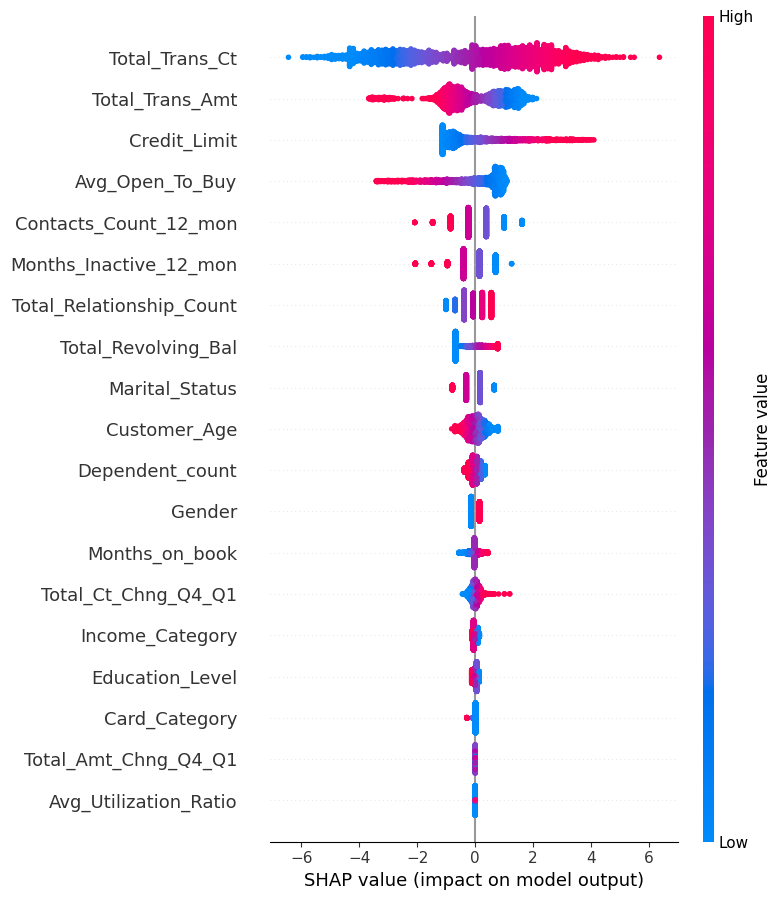

In [36]:
explainer = shap.LinearExplainer(logR_Model, X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

This plot shows the distribution of feature values across two categories which might be churn vs. non-churn, depicted by two different colors.
The width of the 'violin' at different levels indicates the density of points, showing where values are concentrated.
This can illustrate, for example, if higher values of "Total_Trans_Ct" are associated with one category over the other.
Points outside the 'violin' could indicate outliers or individual observations.
Such a plot helps to visualize both the distribution of data points and their relationship to the outcome (churn).

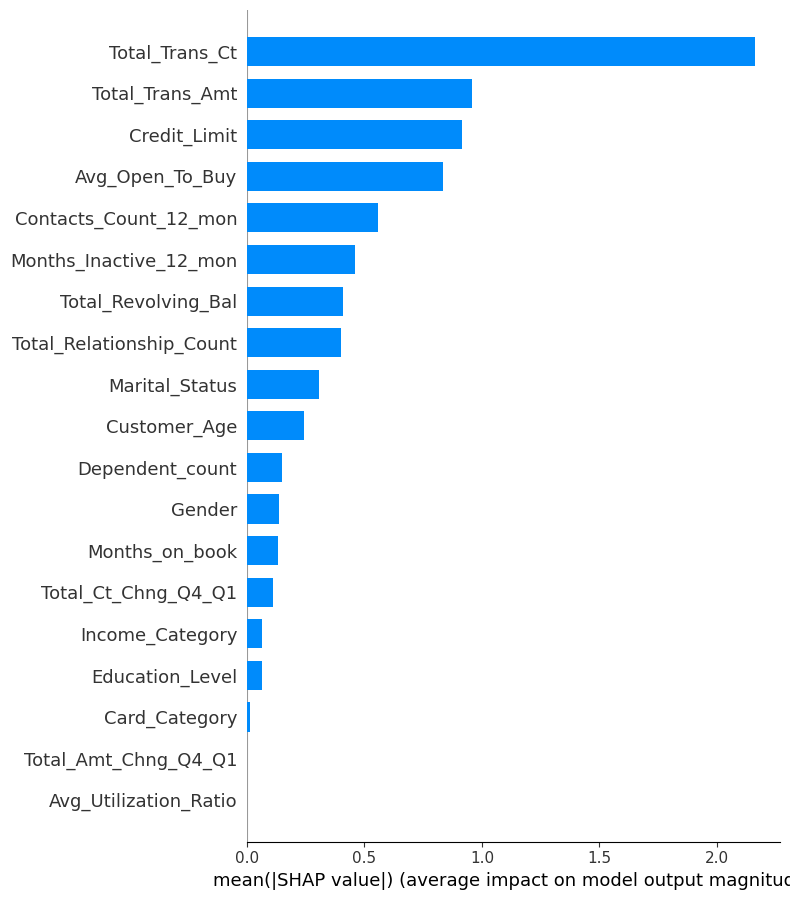

In [37]:
explainer = shap.Explainer(logR_Model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

This chart shows the importance or influence of different features on the model's predictions, often derived from the magnitude of the model's coefficients.
Longer bars represent greater influence. For example, "Total_Trans_Ct" appears to be the most influential feature, likely having a significant impact on the model's predictions.
Features like "Marital_Status" and "Dependent_count" have shorter bars, indicating they have less influence on the model's output.
This chart can help in understanding which features are most predictive of churn and could be a focus for interventions or further analysis.

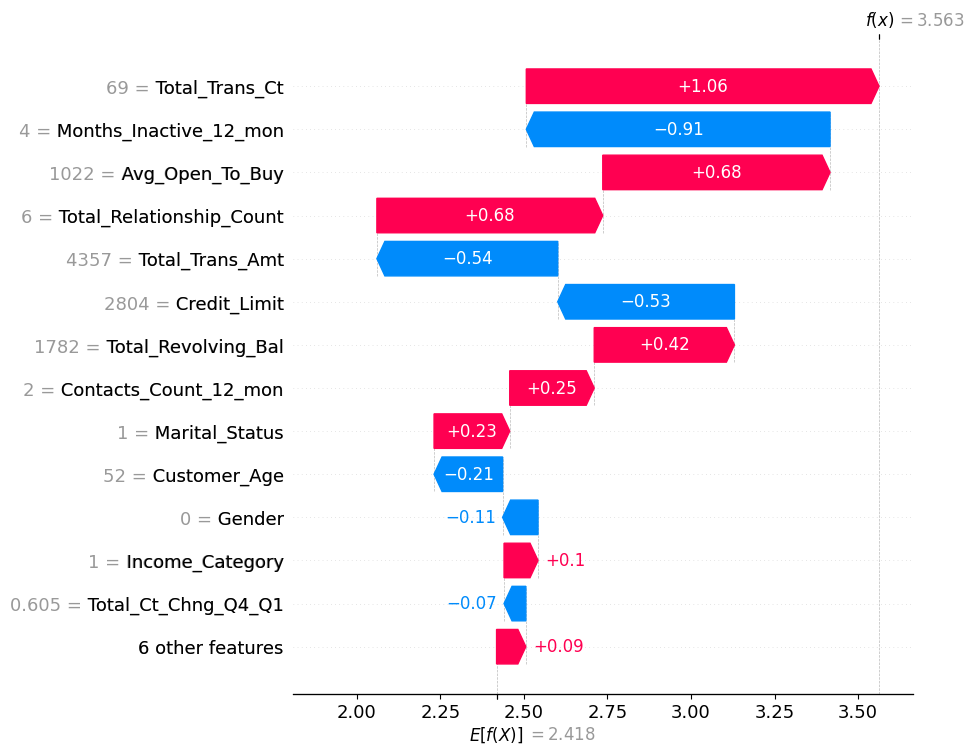

In [38]:
sample_ind = 20
# Create the SHAP explainer
explainer = shap.Explainer(logR_Model, X_train)

# Calculate SHAP values for a single instance
shap_values = explainer(X_train.iloc[[sample_ind]])

# Generate the SHAP waterfall plot for the selected instance
shap.plots.waterfall(shap_values[0], max_display=14)

Each bar represents the impact of an individual feature on the model's prediction for this particular instance, relative to the base value. Red bars represent features that push the prediction higher (increase the probability of the positive class), while blue bars push the prediction lower (decrease the probability of the positive class).

#XGBoost Model

In [39]:
import xgboost as XGB
import shap
from sklearn.metrics import accuracy_score


# Create an XGBoost classifier
XGBoost_Model = XGB.XGBClassifier(objective='binary:logistic', max_depth=4, learning_rate=0.1, n_estimators=100, seed=42)

# Fit the model
XGBoost_Model.fit(X_train, y_train)

# Make predictions
y_pred = XGBoost_Model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


<Figure size 2000x1500 with 0 Axes>

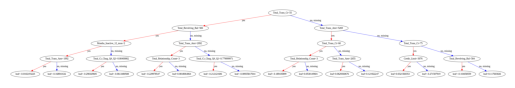

In [40]:
from xgboost import plot_tree
plt.figure(figsize=(20, 15))
plot_tree(XGBoost_Model, num_trees=1)

# plot to a file with higher resolution
plt.savefig('xgboost_nodes.png', dpi=300)
plt.show()

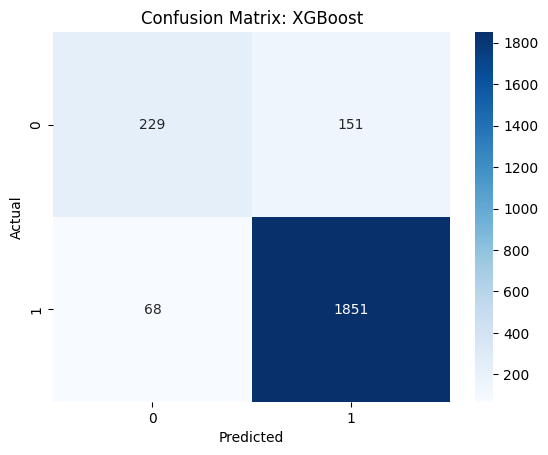

In [41]:
confusion_matrix_xgb = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix_logR, annot=True, fmt="d", cmap = 'Blues')
plt.title("Confusion Matrix: XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [42]:
# Calculate classification report
classification_rep = classification_report(y_test, y_pred)
print("Accuracy of Decision Tree:", accuracy)
print("\n Classification Report:\n", classification_rep)

Accuracy of Decision Tree: 0.966072205306655

 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       380
           1       0.98      0.98      0.98      1919

    accuracy                           0.97      2299
   macro avg       0.95      0.93      0.94      2299
weighted avg       0.97      0.97      0.97      2299



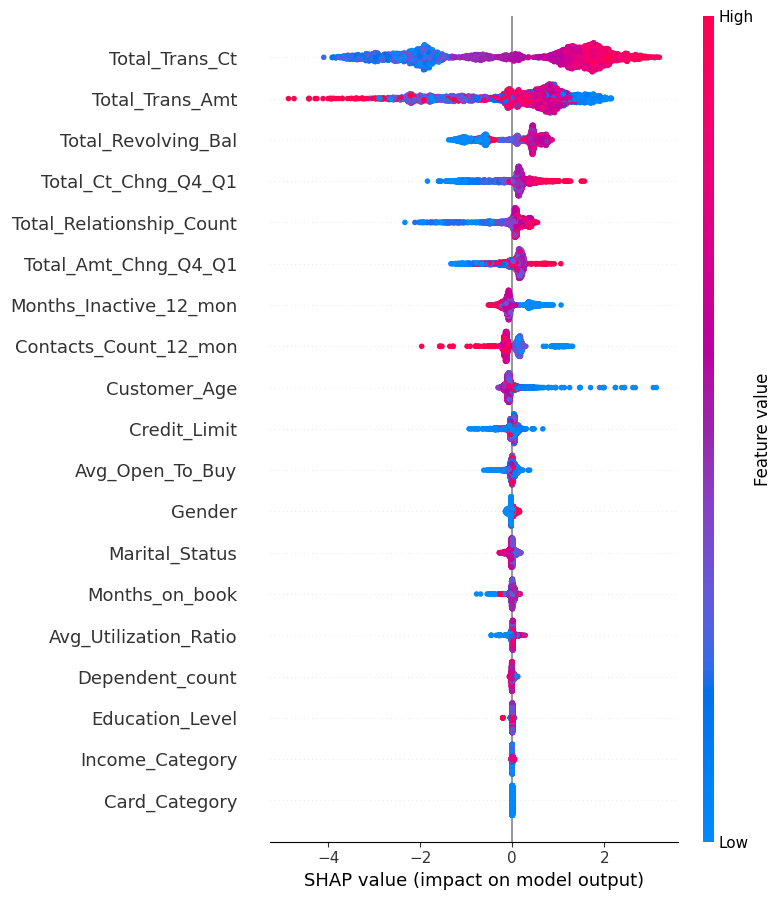

In [43]:
explainer = shap.Explainer(XGBoost_Model, X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

This plot might be showing the marginal effect one or two features have on the predicted outcome of the model.
It provides insight into the relationship between the value of a feature and the likelihood of a particular outcome.
The "Total_Trans_Ct" feature, for example, might show an increasing likelihood of the target outcome as the feature value increases.

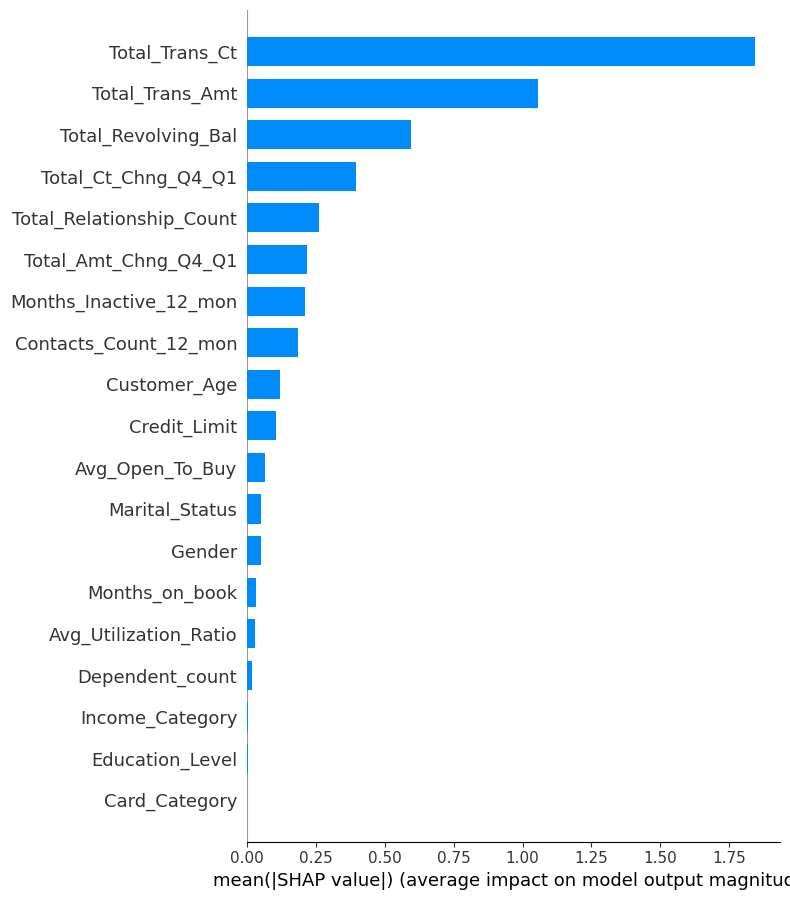

In [44]:
explainer = shap.Explainer(XGBoost_Model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

This bar chart ranks features based on their importance, which is typically computed from the average gain of the feature when it is used in trees.
The longer the bar, the more important the feature. "Total_Trans_Ct" is the most important feature, implying it has the most significant influence on the model's decisions.

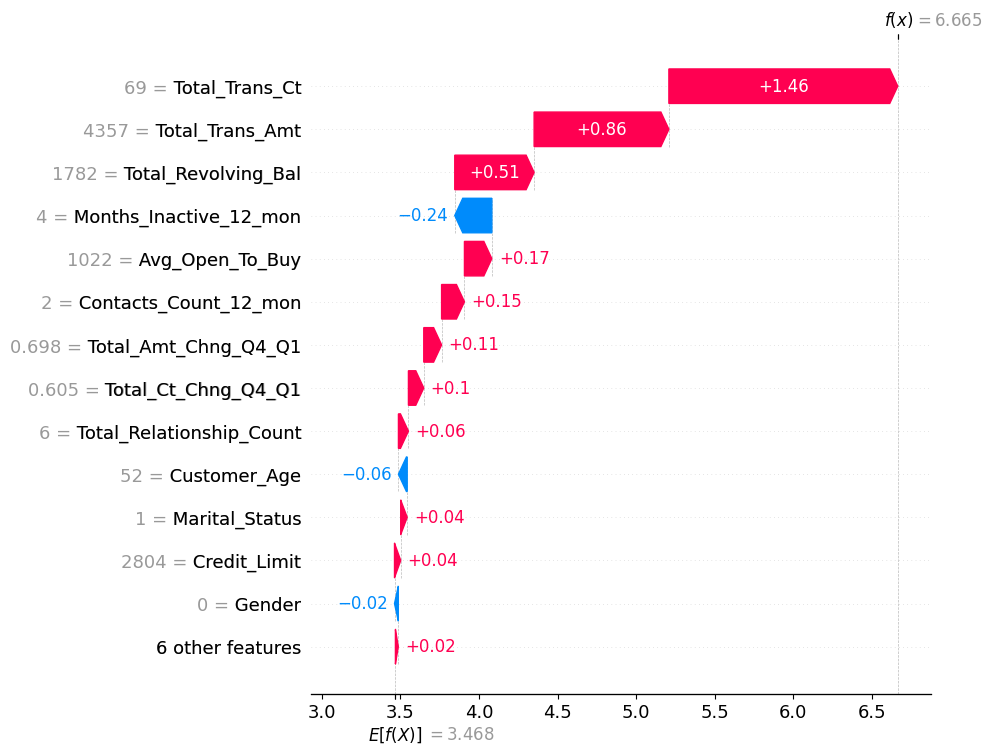

In [45]:
sample_ind = 20
# Create the SHAP explainer
explainer = shap.Explainer(XGBoost_Model, X_train)

# Calculate SHAP values for a single instance
shap_values = explainer(X_train.iloc[[sample_ind]])

# Generate the SHAP waterfall plot for the selected instance
shap.plots.waterfall(shap_values[0], max_display=14)

SHAP values (SHapley Additive exPlanations) explain the contribution of each feature to the model's prediction for an individual sample.
In the plot, each point represents a SHAP value for a feature and an observation. For instance, for "Total_Trans_Ct", positive SHAP values (red) indicate a higher likelihood of the target outcome (possibly churn), while negative values (blue) indicate a lower likelihood.
Features are ordered by the sum of SHAP value magnitudes over all samples. "Total_Trans_Ct" with the highest SHAP values is the most impactful feature.
The color represents the feature value (red is high, blue is low).

#AutoML

In [46]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [47]:
#minimum memory size (in gigabytes) that should be allocated
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

5


In [48]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)
#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:31192..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.25" 2024-10-15; OpenJDK Runtime Environment (build 11.0.25+9-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.25+9-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpgs0tnzs1
  JVM stdout: /tmp/tmpgs0tnzs1/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpgs0tnzs1/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:31192
Connecting to H2O server at http://127.0.0.1:31192 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         04 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.6
H2O_cluster_version_age:    1 month and 2 days
H2O_cluster_name:           H2O_from_python_unknownUser_90j0q1
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    5 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:31192
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

#H2o AutoML Execution

In [49]:
# Convert pandas DataFrame to H2O Frame
hf = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [50]:
hf.types

{'Attrition_Flag': 'int',
 'Customer_Age': 'int',
 'Gender': 'int',
 'Dependent_count': 'int',
 'Education_Level': 'int',
 'Marital_Status': 'int',
 'Income_Category': 'int',
 'Card_Category': 'int',
 'Months_on_book': 'int',
 'Total_Relationship_Count': 'int',
 'Months_Inactive_12_mon': 'int',
 'Contacts_Count_12_mon': 'int',
 'Credit_Limit': 'real',
 'Total_Revolving_Bal': 'int',
 'Avg_Open_To_Buy': 'real',
 'Total_Amt_Chng_Q4_Q1': 'real',
 'Total_Trans_Amt': 'int',
 'Total_Trans_Ct': 'int',
 'Total_Ct_Chng_Q4_Q1': 'real',
 'Avg_Utilization_Ratio': 'real'}

In [51]:
pct_rows=0.80
hf_train, hf_test = hf.split_frame([pct_rows])

In [52]:
print(hf_train.shape)
print(hf_test.shape)

(8157, 20)
(1970, 20)


In [53]:
#Display all columns in X
X = hf.columns
print(X)

['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [54]:
#Seperate Dependent variable from Independent variable
y_output ='Attrition_Flag'
X.remove(y_output)
print('Features except target variable: ',X)
print('Target Variable: ',y_output)

Features except target variable:  ['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
Target Variable:  Attrition_Flag


In [55]:
#Set the AutoML
aml = H2OAutoML(max_runtime_secs=run_time, sort_metric='MAE',max_models=10 ,seed=1, exclude_algos=['DeepLearning'])

#Pass the data through H20AutoML
aml.train(x=X,y=y_output,training_frame=hf_train)

AutoML progress: |
23:38:39.437: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

████████
23:39:07.169: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
23:39:09.812: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██████████
23:39:47.270: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███
23:39:56.963: _response

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20241204_233838


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  8/10
# GBM base models (used / total)      4/4
# XGBoost base models (used / total)  3/3
# DRF base models (used / total)      1/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.006231206297294875
RMSE: 0.0789379902030377
MAE: 0.0400576477473891
RMSLE: 0.05878272225937929
Mean Residual Deviance: 0.006231206297294875
R^2: 0.9534890133328436
Null degrees of freedom: 8156
Residual degrees of freedom: 8148
Null deviance: 1092.8159862694058
Residual deviance: 50.8279497670343
AIC: -18254.194569341704

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.026369612047388306
RMSE: 0.162387228707766
MAE: 0.07822826961247371
RMSLE: 0.11604390878661477
Mean Residual Deviance: 0.026369612047388306
R^2: 0.8031718714100978
Null degrees of freedom: 8156
Residual degrees of freedom: 8149
Null deviance: 1092.8350692604515
Residual deviance: 215.0969254705464
AIC: -6488.560943769246

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     -1290.07   240.776     -1452.17      -1100.82      -1463.21      -1471.23      -962.951
loglikelihood           0          0           0             0             0             0             0
mae                     0.0785873  0.00571832  0.0744854     0.0841198     0.0739455     0.0748703     0.0855155
mean_residual_deviance  0.0264507  0.00337265  0.0244355     0.0297932     0.0238045     0.023764      0.0304563
mse                     0.0264507  0.00337265  0.0244355     0.0297932     0.0238045     0.023764      0.0304563
null_deviance           218.567    8.05845     222.709       224.719       220.347       220.552       204.508
r2                      0.802801   0.0230537   0.814884      0.780038      0.821964      0.821567      0.775554
residual_deviance       43.026     4.48249     41.2227       49.4269       39.2298       39.3532       45.8977
rmse                    0.162377   0.0102687   0.156319      0.172607      0.154287      0.154156      0.174517
rmsle                   0.116051   0.00724375  0.111699      0.122789      0.110444      0.11028       0.125041

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [56]:
# Get the AutoML leaderboard
leaderboard = aml.leaderboard

# Print the leaderboard
print(leaderboard)

model_id                                                       mae      rmse        mse     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20241204_233838     0.0782283  0.162387  0.0263696  0.116044                 0.0263696
GBM_4_AutoML_1_20241204_233838                           0.079392   0.166302  0.0276564  0.11861                  0.0276564
StackedEnsemble_BestOfFamily_1_AutoML_1_20241204_233838  0.0795466  0.164179  0.0269547  0.117049                 0.0269547
GBM_3_AutoML_1_20241204_233838                           0.0799695  0.166723  0.0277964  0.11942                  0.0277964
GBM_2_AutoML_1_20241204_233838                           0.0804607  0.167201  0.0279562  0.119915                 0.0279562
DRF_1_AutoML_1_20241204_233838                           0.0827954  0.178667  0.0319219  0.128424                 0.0319219
XRT_1_AutoML_1_20241204_233838                           0.0876164  0.17883   0.0319802  0.127893                 0.0319802
XGBoost_

model_id                                                    mae      rmse        mse     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
----------------------------------------------------  ---------  --------  ---------  --------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_1_AutoML_1_20241204_233838  0.0782283  0.162387  0.0263696  0.116044                 0.0263696                4636                   0.183629  StackedEnsemble
GBM_4_AutoML_1_20241204_233838                        0.079392   0.166302  0.0276564  0.11861                  0.0276564                2410                   0.039052  GBM
GBM_3_AutoML_1_20241204_233838                        0.0799695  0.166723  0.0277964  0.11942                  0.0277964                1480                   0.0222    GBM
GBM_2_AutoML_1_20241204_233838                        0.0804607  0.167201  0.0279562  0.119915                 0.0279562                1316                   0.019526  GBM
DRF_1_AutoML_1_20241204_233838                        0.0827954  0.178667  0.0319219  0.128424                 0.0319219                1716                   0.016621  DRF
XRT_1_AutoML_1_20241204_233838                        0.0876164  0.17883   0.0319802  0.127893                 0.0319802                2114                   0.016508  DRF
XGBoost_3_AutoML_1_20241204_233838                    0.0939378  0.179453  0.0322033  0.130443                 0.0322033                1022                   0.0034    XGBoost
GLM_1_AutoML_1_20241204_233838                        0.217874   0.290509  0.0843955  0.200471                 0.0843955                 142                   0.000768  GLM
[8 rows x 9 columns]

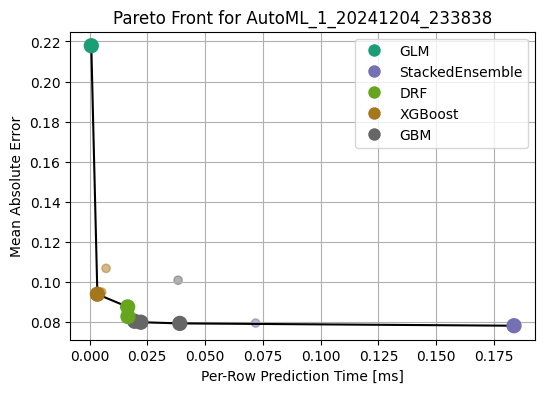

In [57]:
pf = aml.pareto_front()
fig = pf.figure()

# Adjust the size of the figure
fig.set_size_inches(6, 4)

# Display the plot
pf

In [58]:
best_model = aml.leader
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20241204_233838


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  8/10
# GBM base models (used / total)      4/4
# XGBoost base models (used / total)  3/3
# DRF base models (used / total)      1/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.006231206297294875
RMSE: 0.0789379902030377
MAE: 0.0400576477473891
RMSLE: 0.05878272225937929
Mean Residual Deviance: 0.006231206297294875
R^2: 0.9534890133328436
Null degrees of freedom: 8156
R

In [59]:
print("Best Model ID:", best_model.model_id)
print("Best Model MSE:", best_model.mse())

Best Model ID: StackedEnsemble_AllModels_1_AutoML_1_20241204_233838
Best Model MSE: 0.006231206297294875


In [60]:
best_model.algo

'stackedensemble'

In [61]:
predictions = best_model.predict(hf_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [62]:
target_column = "Attrition_Flag"

# Add the actual labels to the predictions DataFrame
predictions[target_column] = hf_test[target_column]

# Evaluate model performance
perf = best_model.model_performance(hf_test)
print(perf)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.023832197503498975
RMSE: 0.15437680364452094
MAE: 0.07367618337903206
RMSLE: 0.11257017015734991
Mean Residual Deviance: 0.023832197503498975
R^2: 0.8278483357412334
Null degrees of freedom: 1969
Residual degrees of freedom: 1961
Null deviance: 272.807589438409
Residual deviance: 46.94942908189298
AIC: -1750.716198448681


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                     rmse        mse        mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  --------  ---------  ---------  --------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_1_AutoML_1_20241204_233838     0.154377  0.0238322  0.0736762  0.11257                  0.0238322                4636                   0.180479  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20241204_233838  0.154926  0.0240019  0.0747324  0.112982                 0.0240019                3267                   0.07137   StackedEnsemble
GBM_4_AutoML_1_20241204_233838                           0.158884  0.0252443  0.0745765  0.116036                 0.0252443                2410                   0.036533  GBM
GBM_3_AutoML_1_20241204_233838                           0.159931  0.0255778  0.0761486  0.116448                 0.0255778                1480                   0.031666  GBM
GBM_2_AutoML_1_20241204_233838                           0.160171  0.0256549  0.0771517  0.116698                 0.0256549                1316                   0.026126  GBM
GBM_1_AutoML_1_20241204_233838                           0.17063   0.0291146  0.0958831  0.12377                  0.0291146                6791                   0.051762  GBM
DRF_1_AutoML_1_20241204_233838                           0.171146  0.029291   0.0803828  0.125857                 0.029291                 1716                   0.023495  DRF
XRT_1_AutoML_1_20241204_233838                           0.173264  0.0300204  0.0866551  0.127255                 0.0300204                2114                   0.026298  DRF
XGBoost_3_AutoML_1_20241204_233838                       0.173472  0.0300927  0.0913568  0.127974                 0.0300927                1022                   0.005044  XGBoost
XGBoost_2_AutoML_1_20241204_233838                       0.175699  0.0308702  0.0902815  0.125983                 0.0308702                1966                   0.007365  XGBoost
XGBoost_1_AutoML_1_20241204_233838                       0.186961  0.0349546  0.102644   0.133577                 0.0349546                2804                   0.009815  XGBoost
GLM_1_AutoML_1_20241204_233838                           0.297726  0.0886409  0.223384   0.206598                 0.0886409                 142                   0.002885  GLM
[12 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

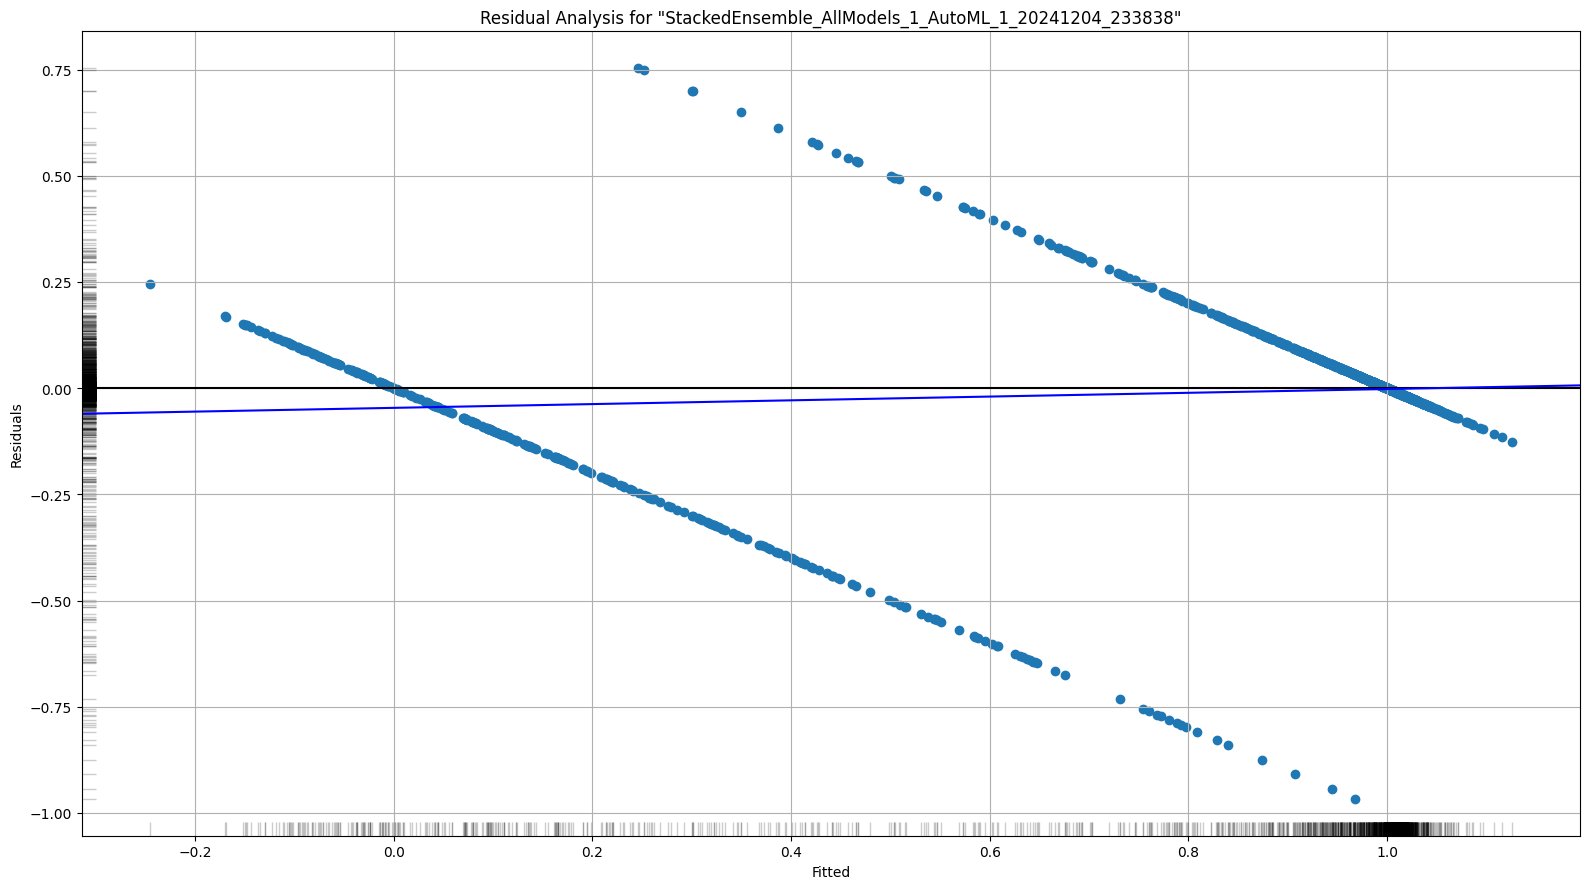

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

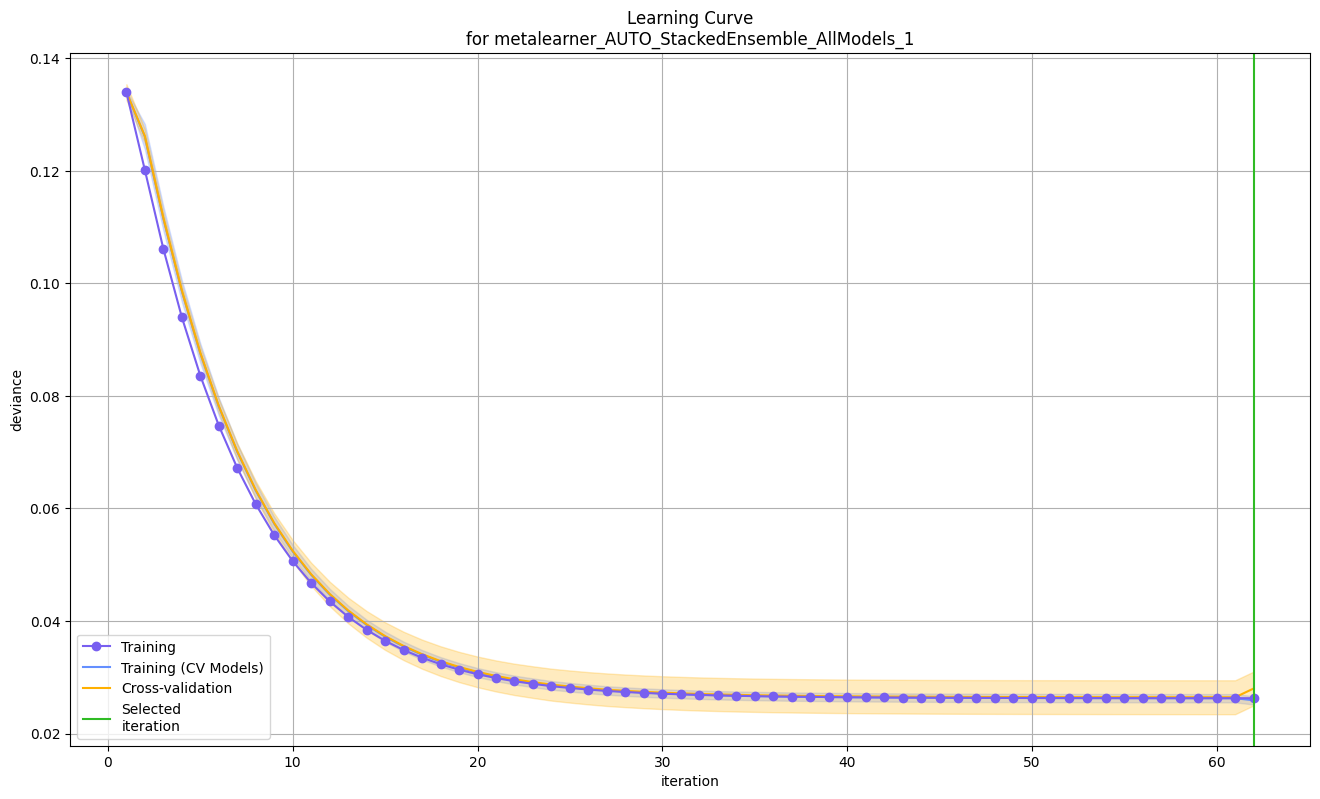

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

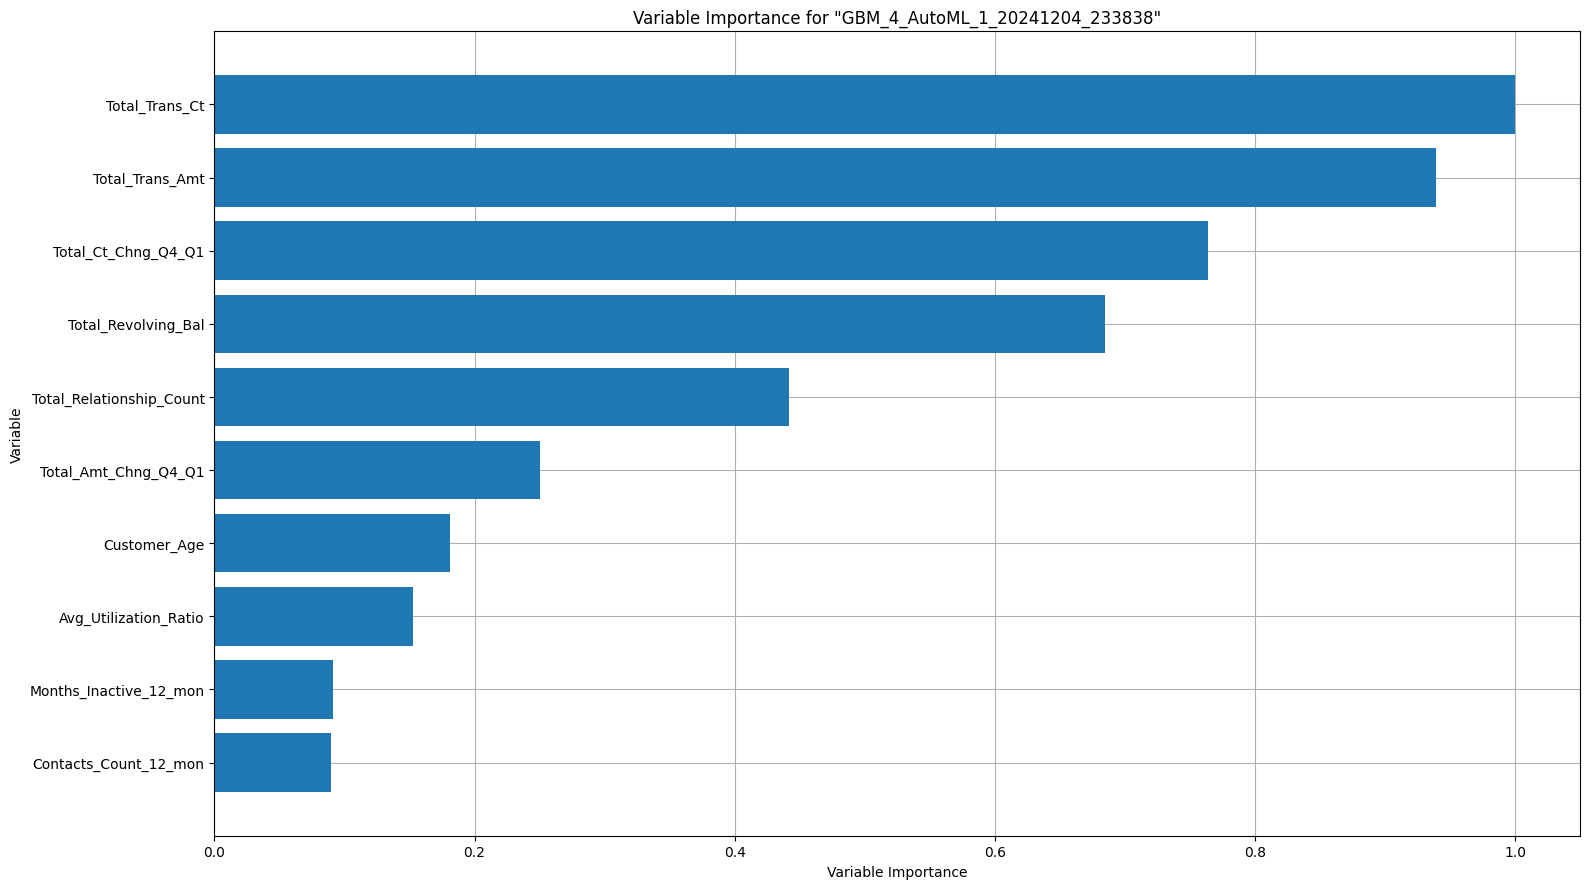

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

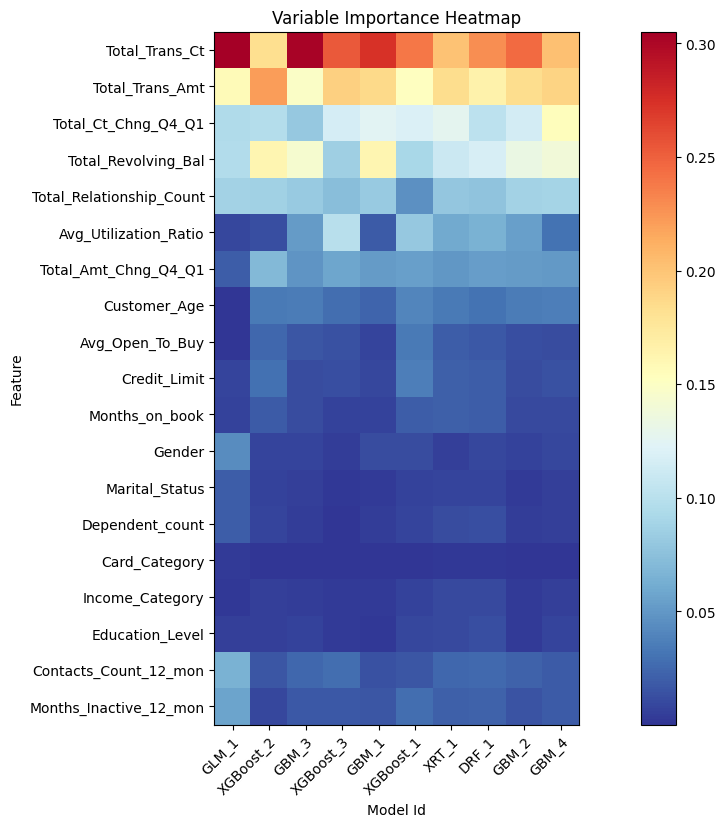

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

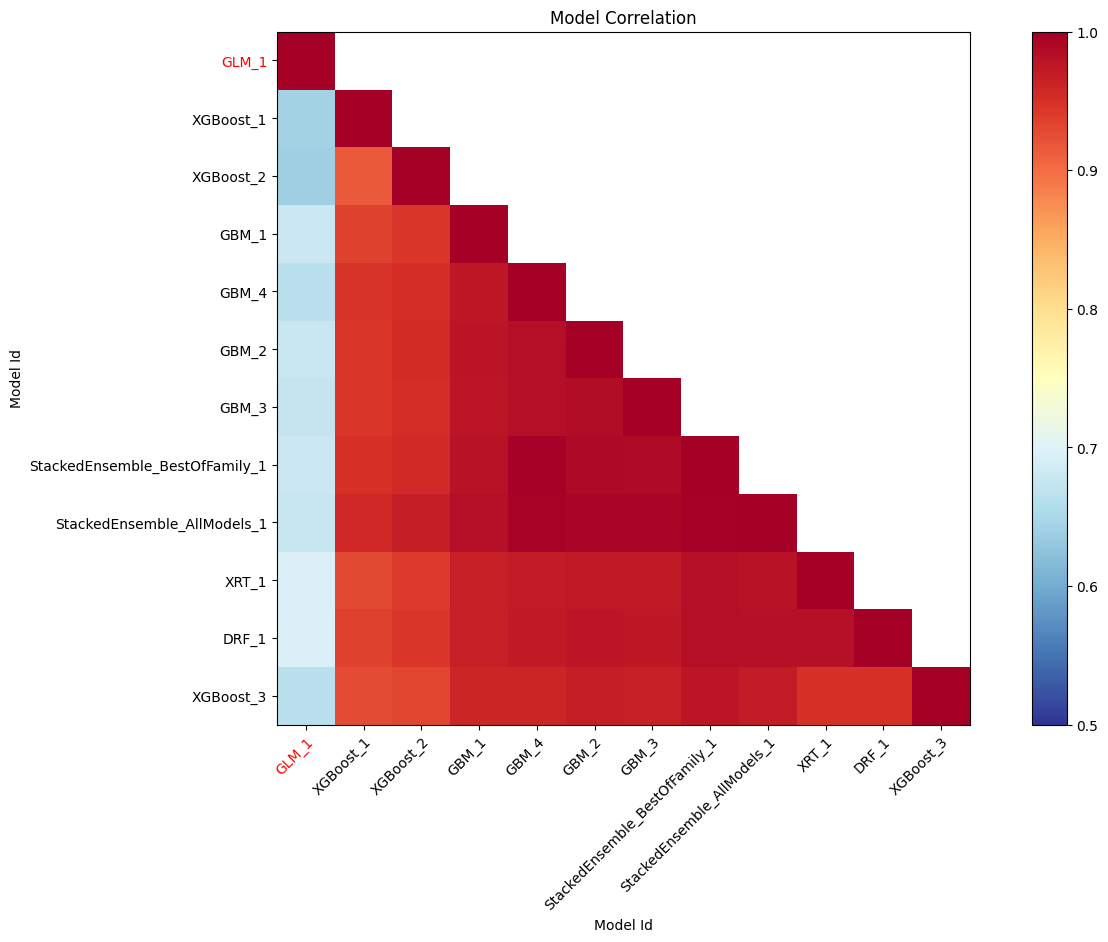

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

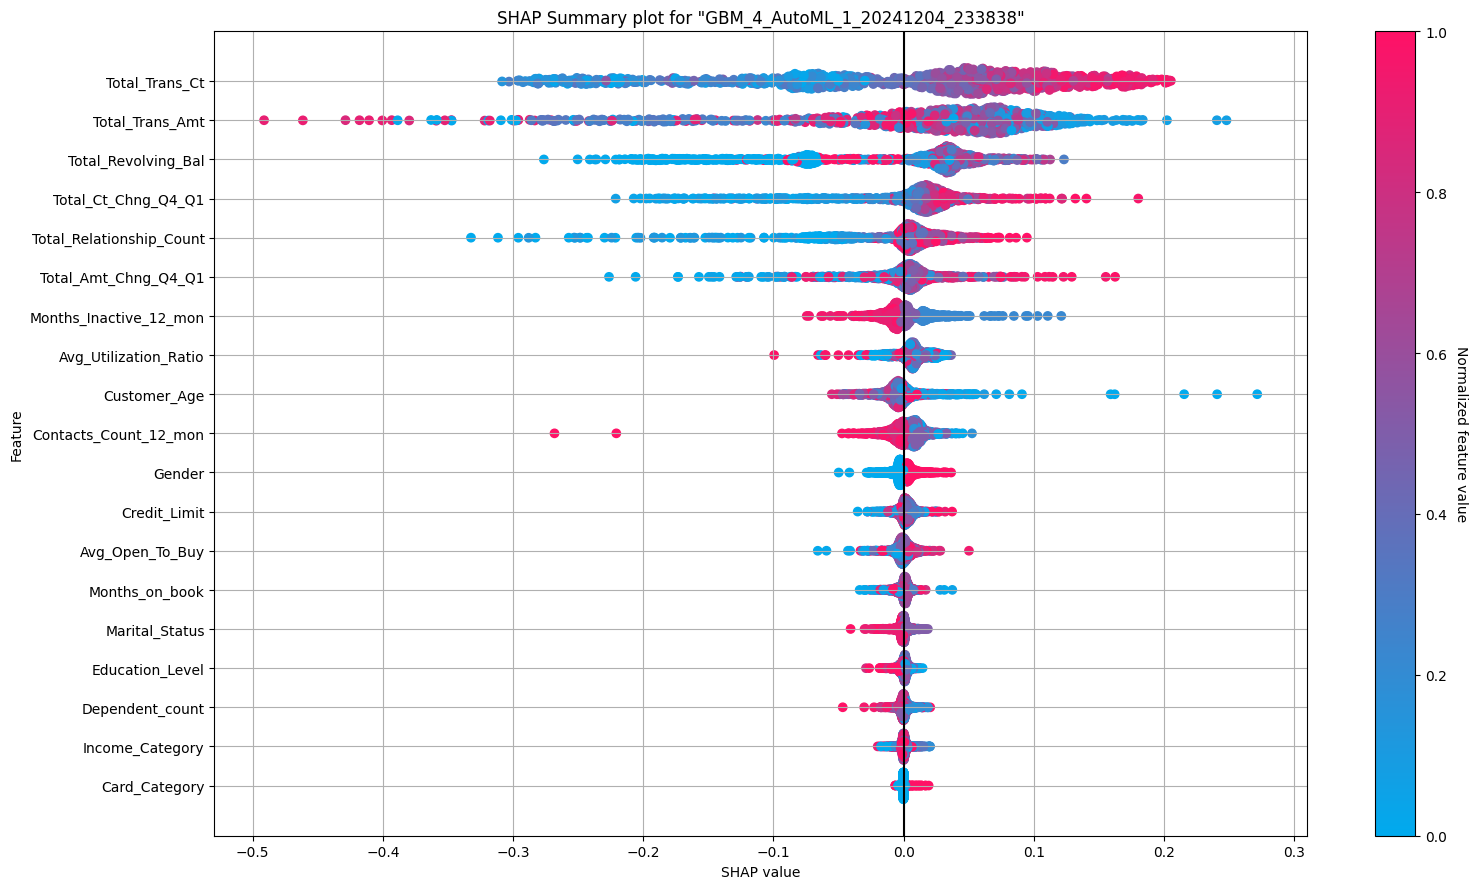

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

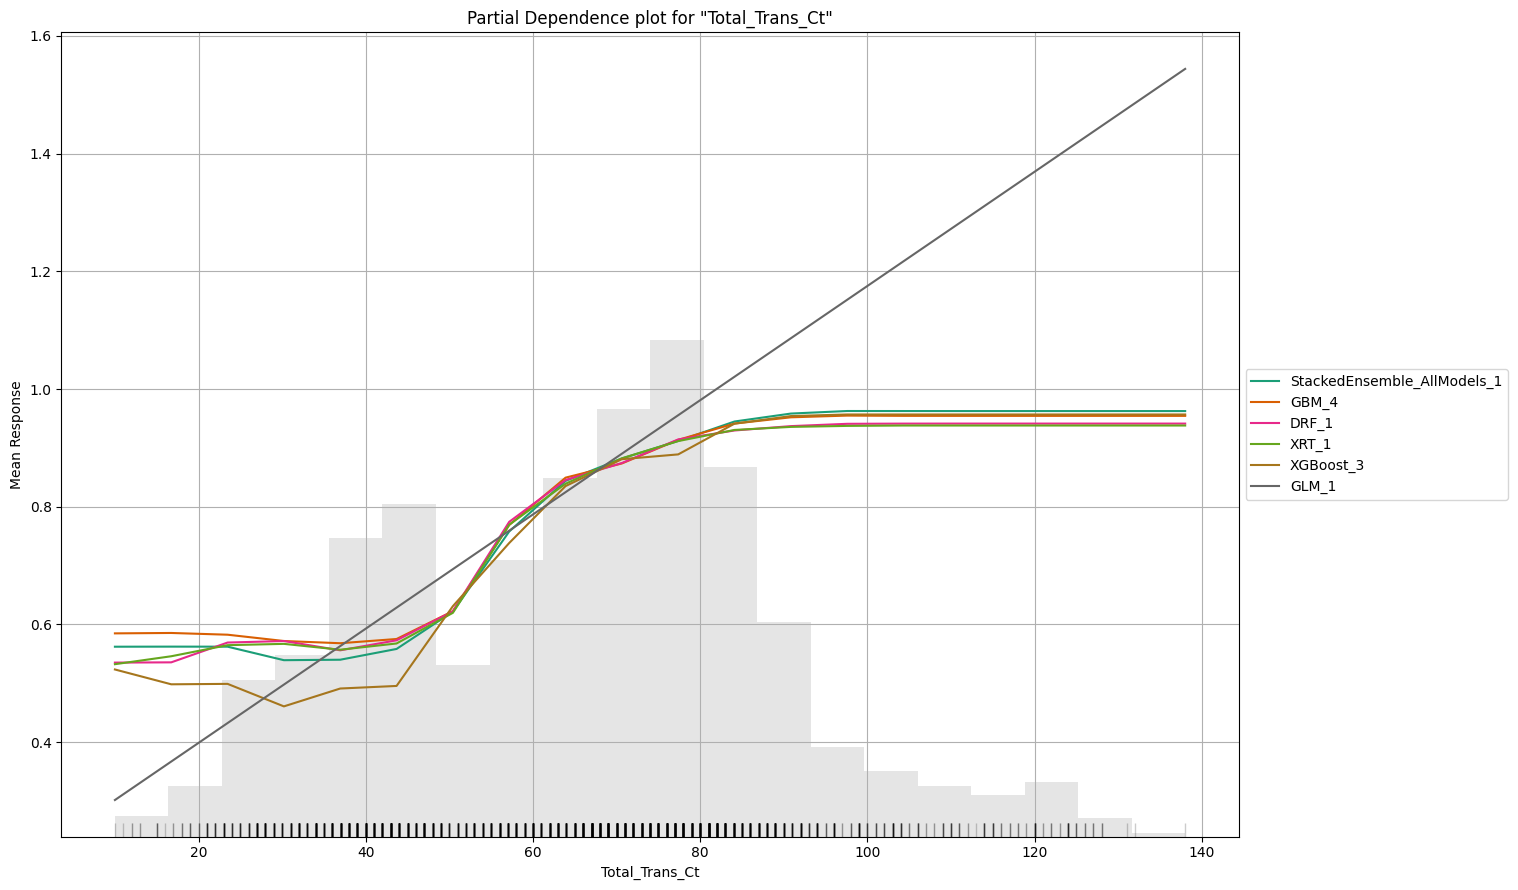

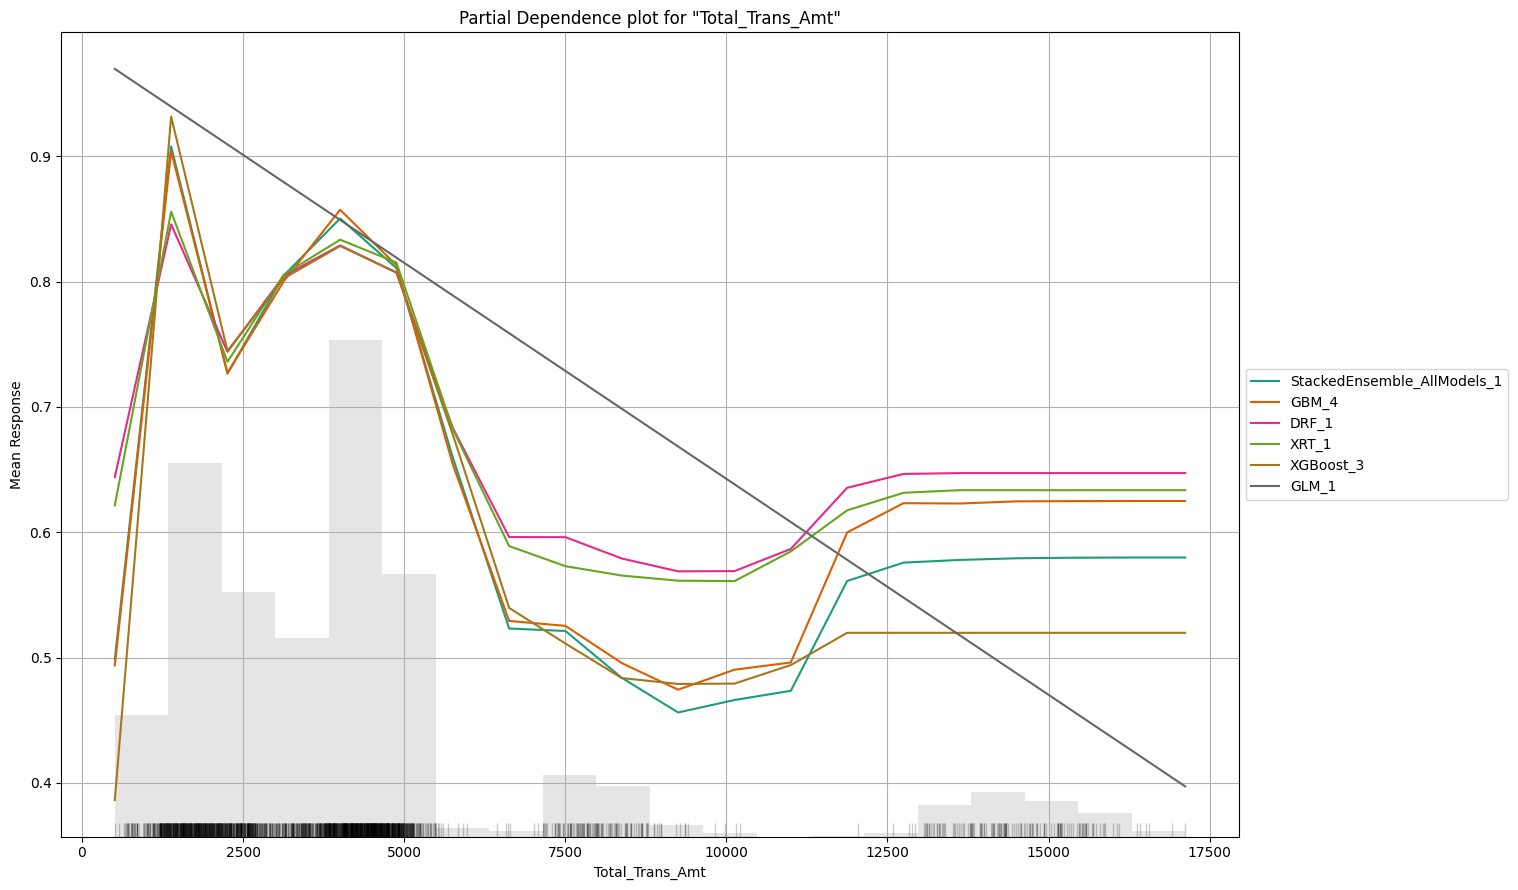

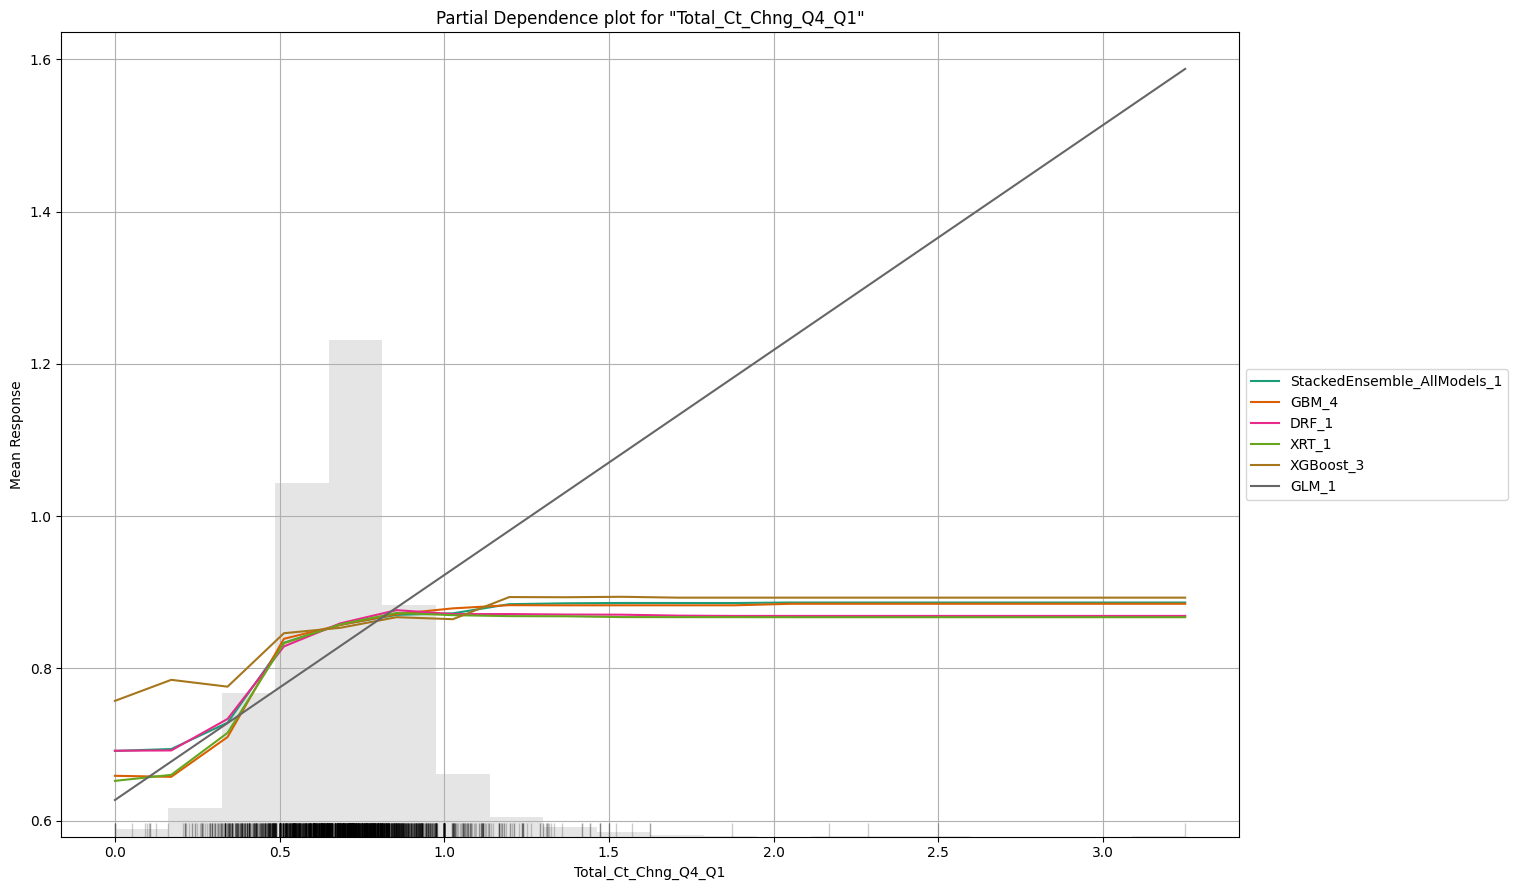

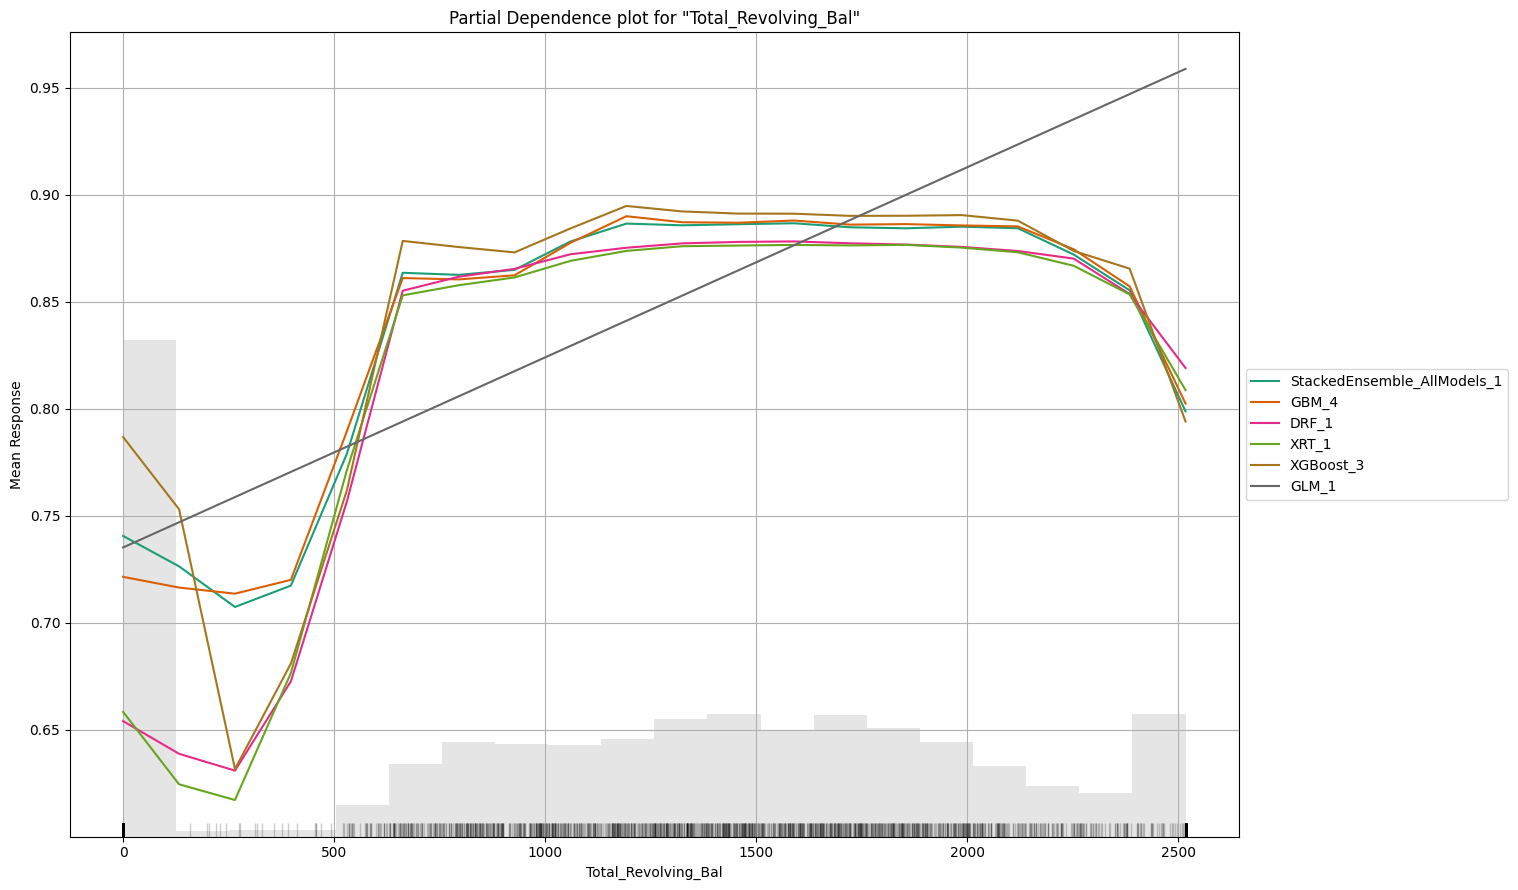

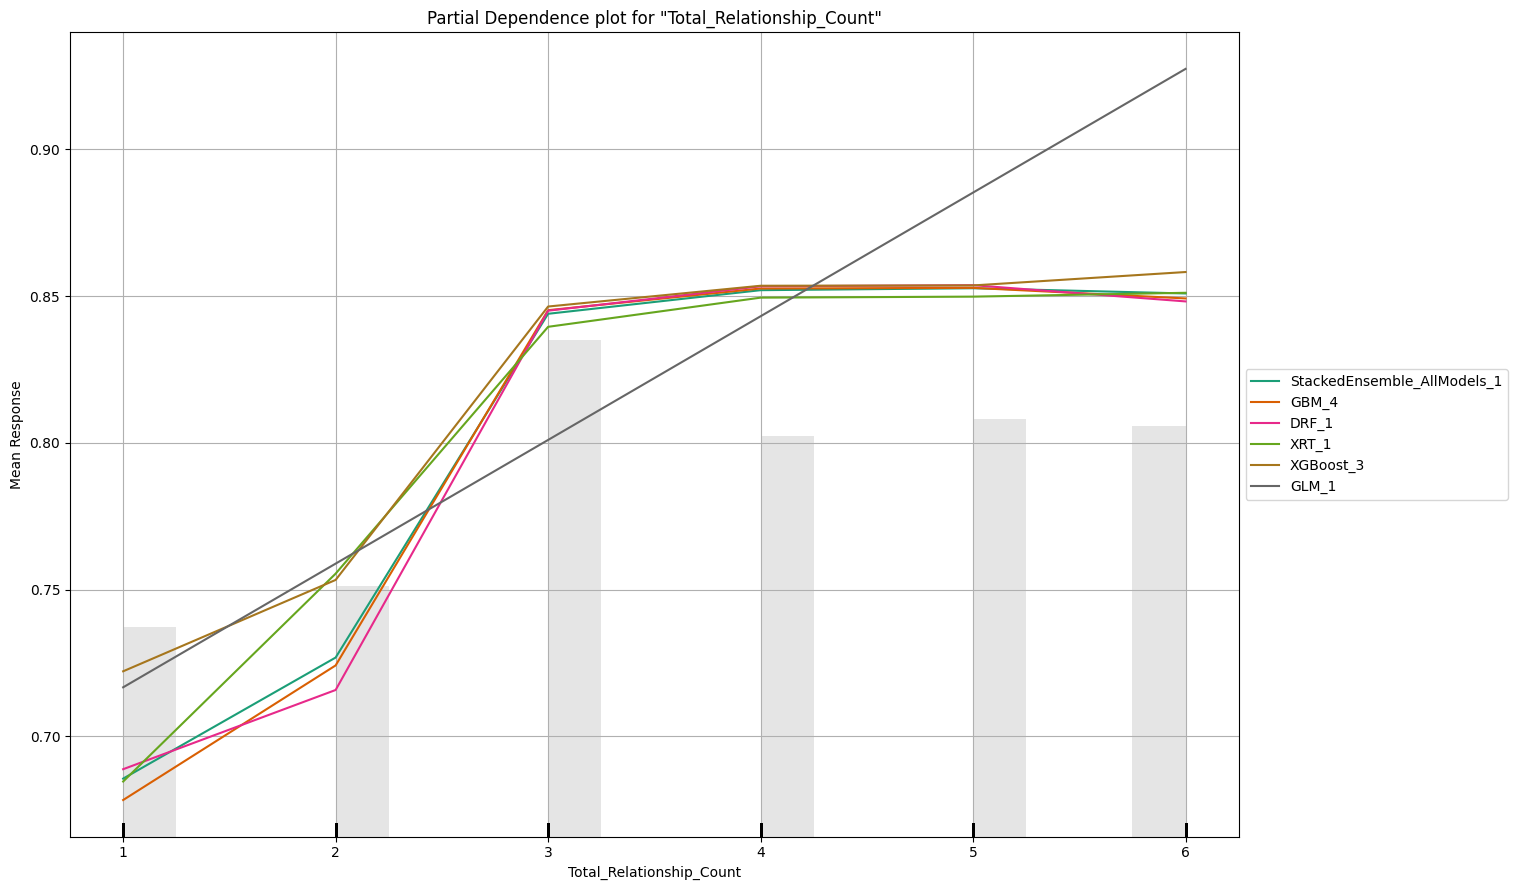

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

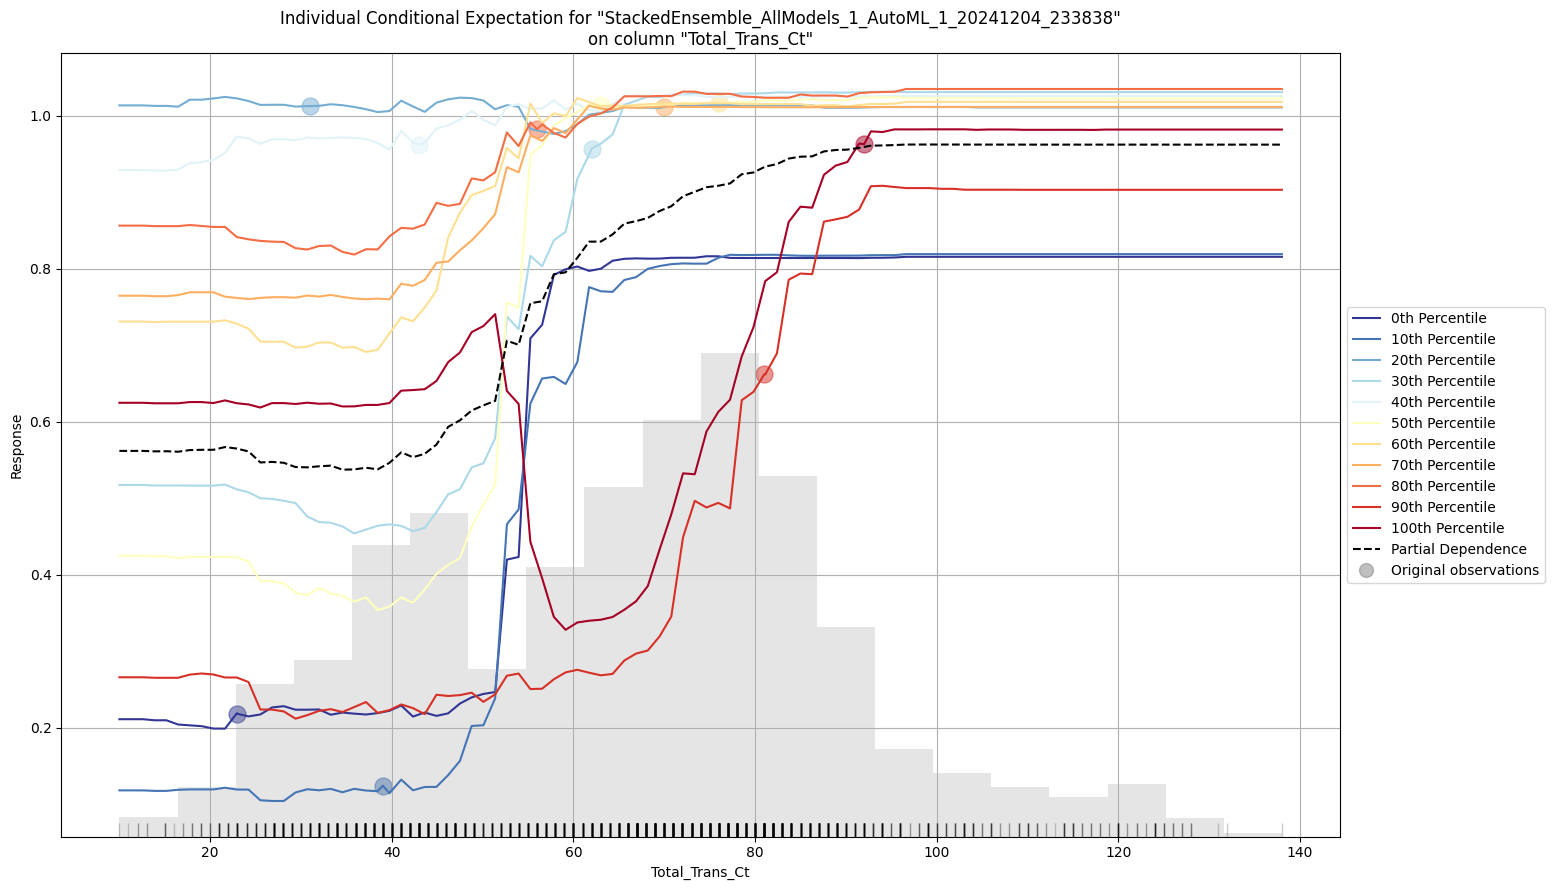

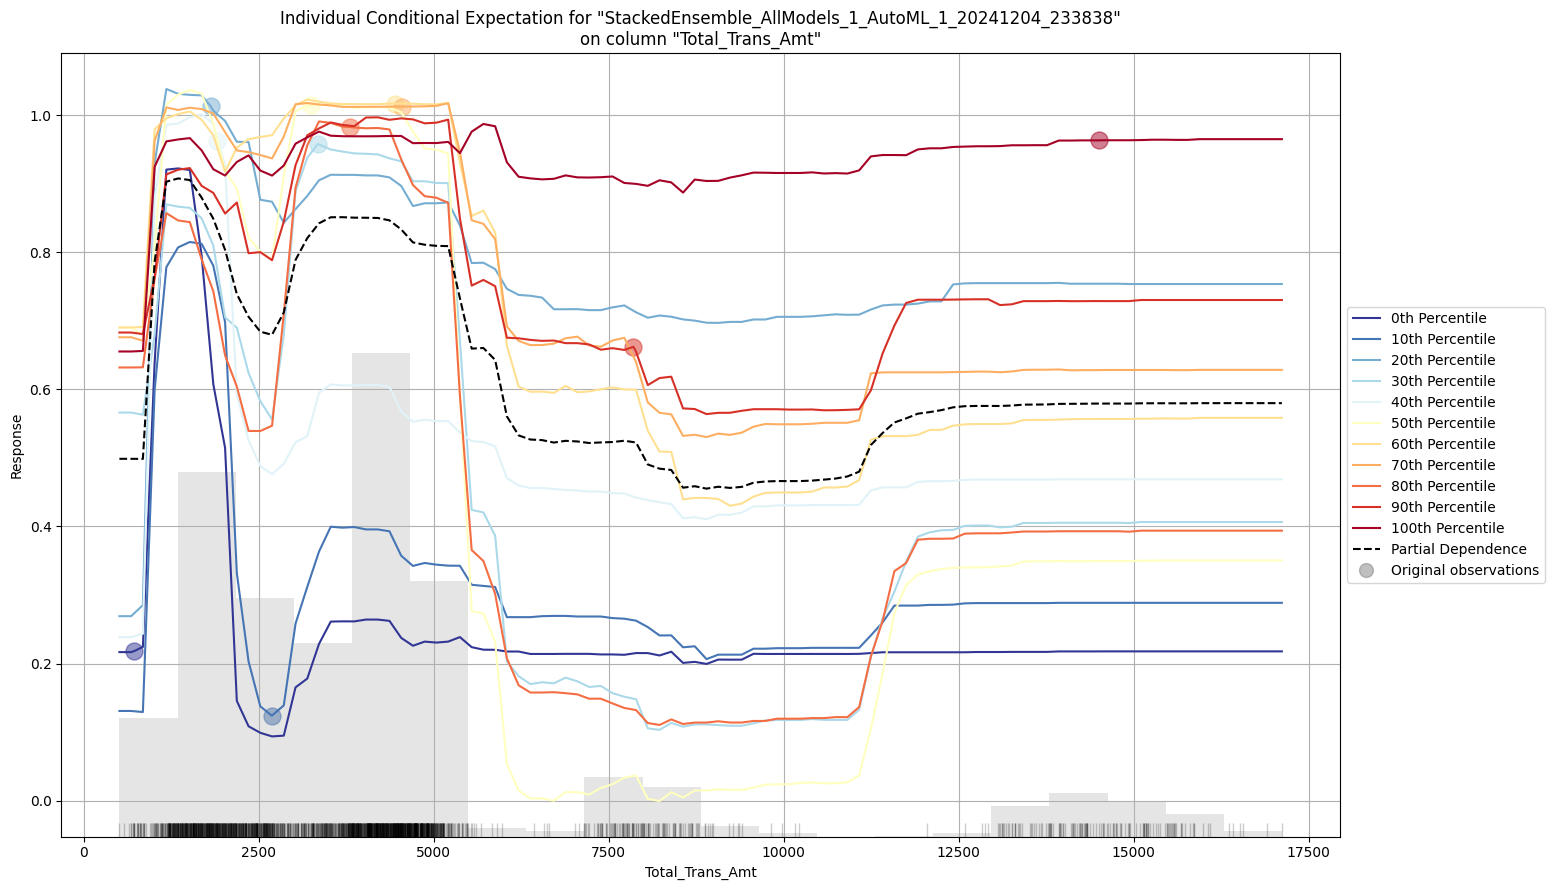

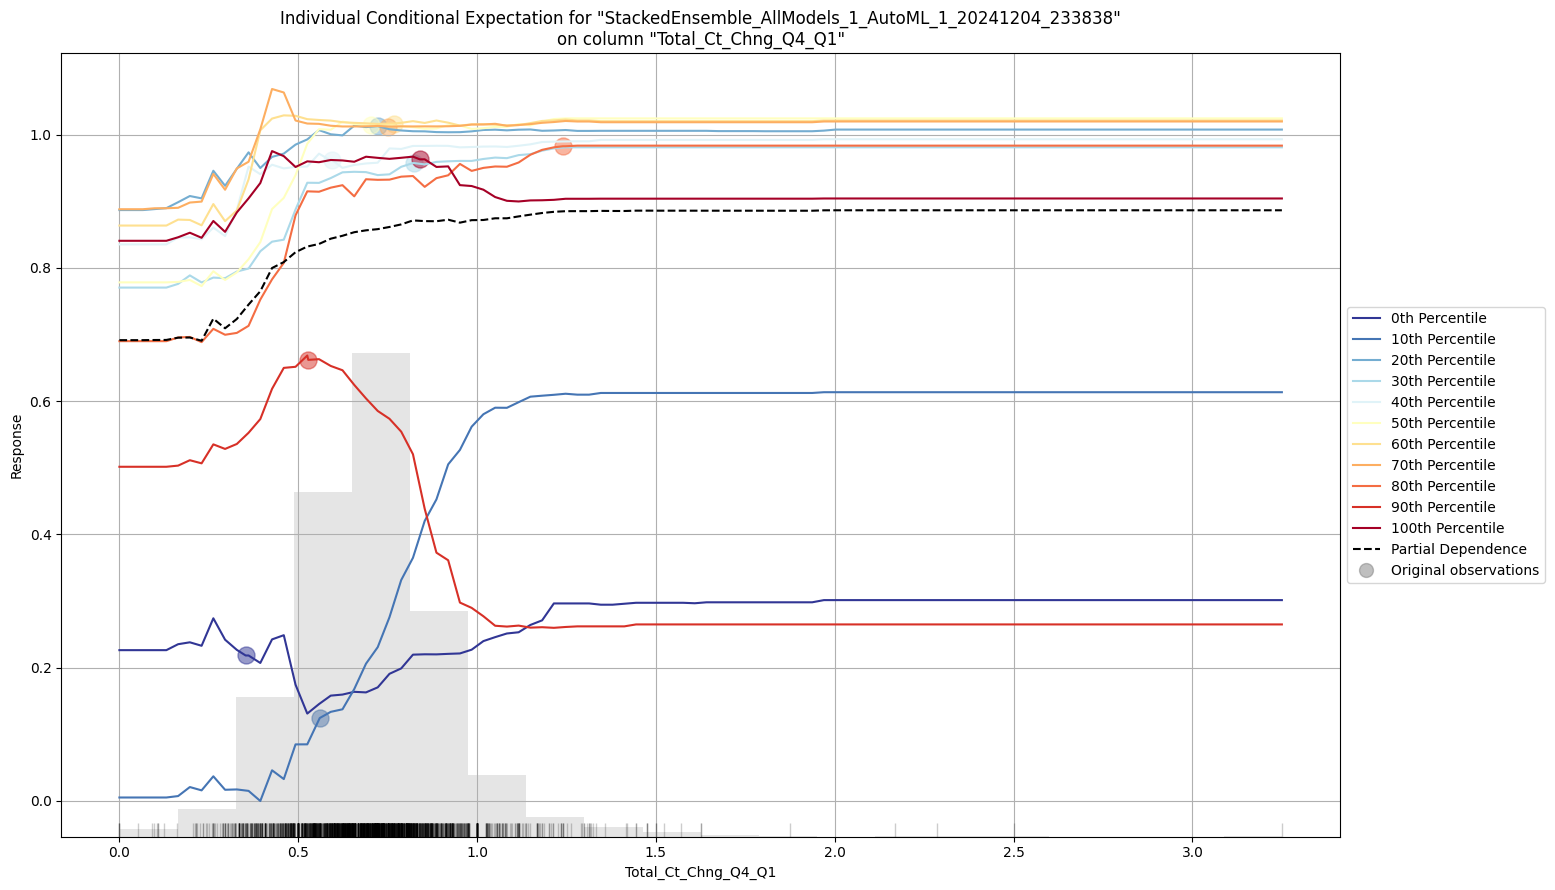

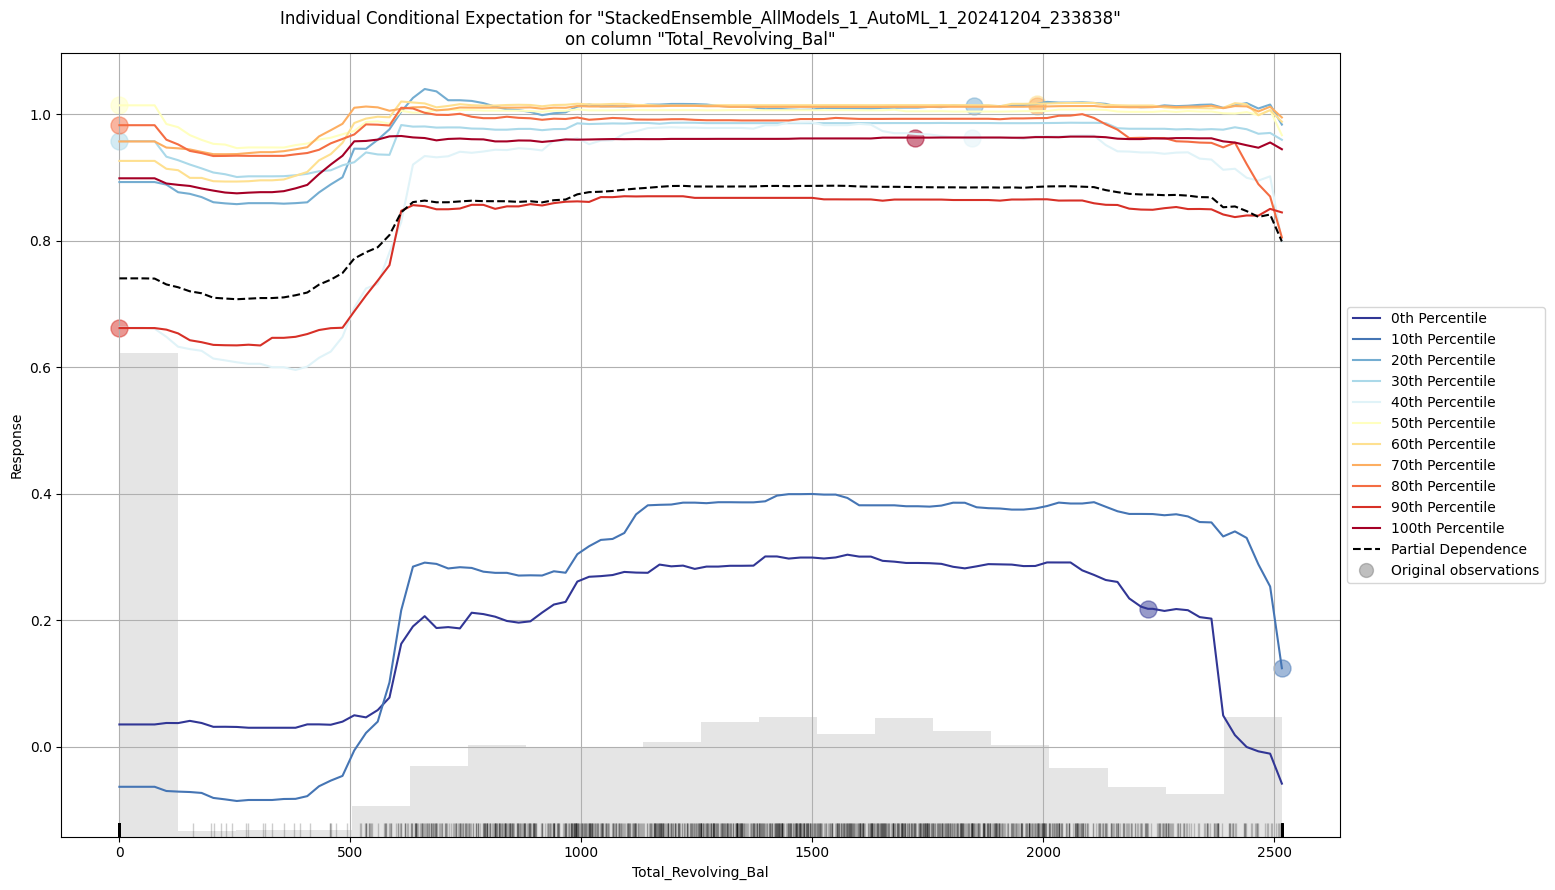

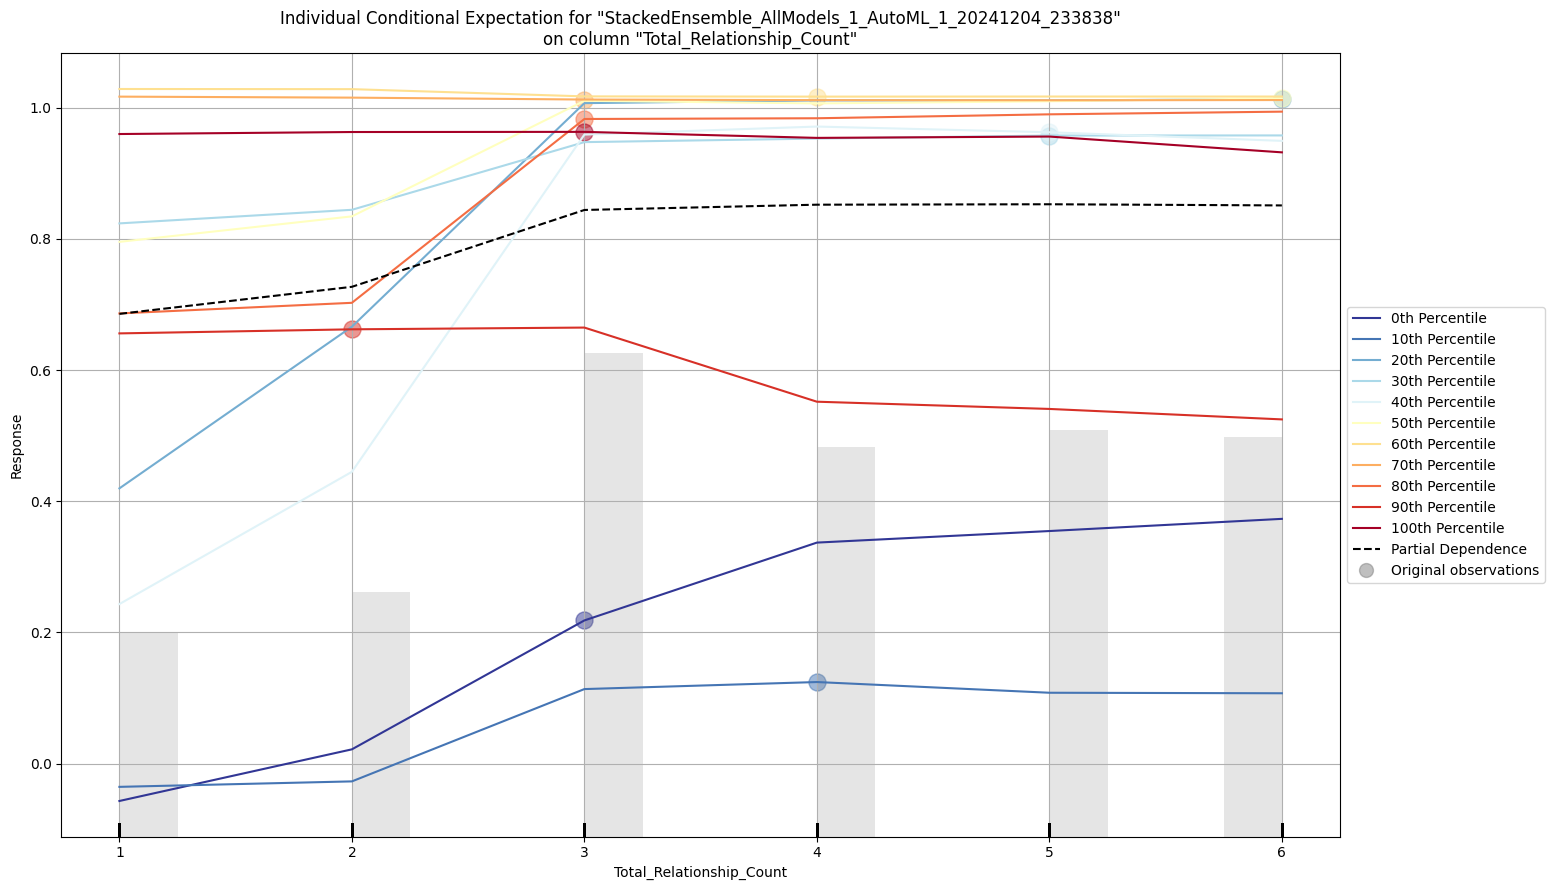

In [63]:
explain_model = aml.explain(frame = hf_test)

## Conclusion -
- The XGBoost model shows "Total_Trans_Ct" as the most impactful feature, with a mix of positive and negative SHAP values, indicating varied effects on the model output across different data points.

- The Linear Regression model seems to attribute significant importance to "Total_Trans_Ct" and "Credit_Limit", with the former having a range of both positive and negative effects, while "Credit_Limit" mostly contributes positively.

- The AutoML model also ranks "Total_Trans_Ct" as highly important but shows "Total_Trans_Amt" and "Total_Revolving_Bal" with larger spreads in SHAP values, indicating a wider variety of effects these features have on the predictions.

In all three models, "Total_Trans_Ct" is consistently a key feature, although the way it impacts the prediction varies. "Total_Trans_Amt" and "Total_Revolving_Bal" are also important across models but with different levels of impact and distribution of effects.

## REFERENCES -
* H2O Documentation: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html?_ga=2.129161676.1179250264.1708398551-1770022984.1708209167
* Scikit-Learn Documentation: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
* Seaborn Documentation: https://seaborn.pydata.org/tutorial/introduction.html
* Analytics Vidhya - https://www.analyticsvidhya.com/blog/2023/01/the-future-of-machine-learning-automl/
* StatsModel - https://www.statsmodels.org/stable/index.html
* AutoML Documents - https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e
- Shap Documentation - https://shap.readthedocs.io/en/latest/

## LICENSE-
MIT License

Copyright (c) 2024 ckulkarni13

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.